In [1]:
%%capture
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

In [2]:
import os
#os.chdir('../src')
os.chdir('/content/drive/MyDrive/UpGrad/Projects/Melanoma Detection/src')

In [3]:
%%capture
# install required libraries
%pip install augmentor

### Data setup

- **Data Reading/Data Understanding** → Defining the path for train and test images
  - Paths are set from the configuration class (see below)
- **Dataset Creation**→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
  - Using StratifiedKFold module from sklearn's model selection, the train images was split into 5 folds, while ensuring uniform distribution accross the labels.
  - Throughout the project, I have used 32 batch size for both train and validation.
  - Since the training is happening on the Google Colab with GPU support, and at the risk of spending time in loading original images and then resizing then to 180x180 pixels is inefficient. I have resized the images and saved in a data folder. In case, the images are missing, then the a method in utils will do the same.
- **Dataset visualisation** → Create a code to visualize one instance of all the nine classes present in the dataset
  - Done in the EDA notebook

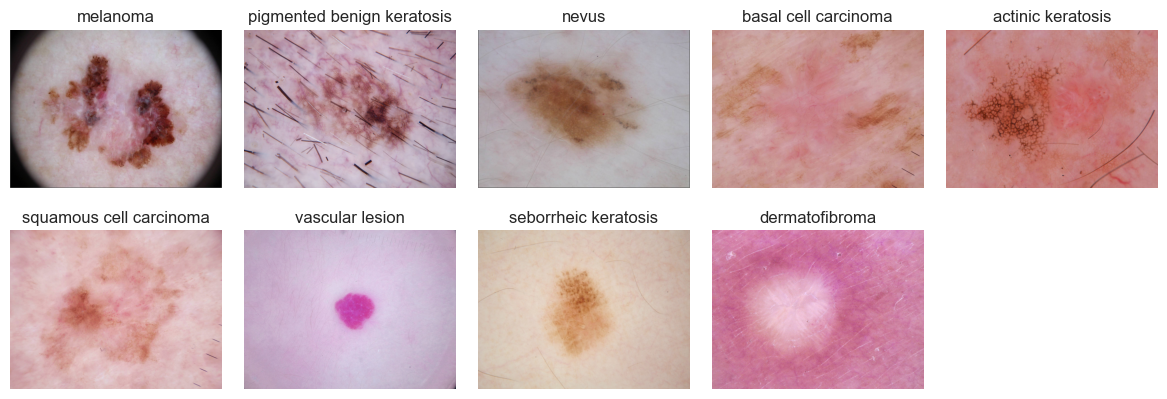

## Baseline model

**Model Building & training:**
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
  - In the dataset.py, I have data generator class where the image pixels are normalized by dividing 255.
- Choose an appropriate optimiser and loss function for model training
Train the model for ~20 epochs
  - Optimizer used throughout the project is Adam with learning rate 1e-4.

Model architecture
- 3 convnets with channels [8, 16, 32] in sequence
- no dropouts

Note that the training setup is equipped with learning rate scheduler and early stopping mechanism, but not using in this project, as recommended.

**notes**:
- Weights are not added to Cross-Entropy loss
- Learning rate decays with multiple 0.1 and patience 5 using the PyTorch ReduceLROnPlateau module.


Current vram: cuda
set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [12:24<00:00,  3.01it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (fcs): Sequential(
    (0): Linear(in_features=15488, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=9, bias=True)
  )
)
Total number of train parameters: 1989785 or (1.99M)


Epoch 1/20: 100%|███████████████████████████████████████████████| 56/56 [00:04<00:00, 11.41it/s, batch_loss=1.966198, epoch_loss=2.079345, learning_rate=0.0001]



>>> [2024-01-17 22:16:59.179965 | 1/20 | Early stopping counter 0] 
    loss          - train: 2.019307      valid: 2.025486 
    accuracy      - train: 0.195980      valid: 0.194196 
    learning rate        : 1.00000e-04



Epoch 2/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.53it/s, batch_loss=1.955866, epoch_loss=2.012010, learning_rate=0.0001]



>>> [2024-01-17 22:17:04.441971 | 2/20 | Early stopping counter 0] 
    loss          - train: 1.999957      valid: 2.005544 
    accuracy      - train: 0.256840      valid: 0.252232 
    learning rate        : 1.00000e-04



Epoch 3/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.28it/s, batch_loss=1.924206, epoch_loss=1.993565, learning_rate=0.0001]



>>> [2024-01-17 22:17:09.913222 | 3/20 | Early stopping counter 0] 
    loss          - train: 1.977967      valid: 1.983887 
    accuracy      - train: 0.280290      valid: 0.281250 
    learning rate        : 1.00000e-04



Epoch 4/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.77it/s, batch_loss=2.082740, epoch_loss=1.968151, learning_rate=0.0001]



>>> [2024-01-17 22:17:14.648097 | 4/20 | Early stopping counter 0] 
    loss          - train: 1.945917      valid: 1.953142 
    accuracy      - train: 0.290341      valid: 0.290179 
    learning rate        : 1.00000e-04



Epoch 5/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.74it/s, batch_loss=1.979776, epoch_loss=1.935686, learning_rate=0.0001]



>>> [2024-01-17 22:17:19.353253 | 5/20 | Early stopping counter 0] 
    loss          - train: 1.908474      valid: 1.918281 
    accuracy      - train: 0.309883      valid: 0.316964 
    learning rate        : 1.00000e-04



Epoch 6/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.01it/s, batch_loss=1.820171, epoch_loss=1.886648, learning_rate=0.0001]



>>> [2024-01-17 22:17:24.855506 | 6/20 | Early stopping counter 0] 
    loss          - train: 1.845667      valid: 1.857773 
    accuracy      - train: 0.373534      valid: 0.377232 
    learning rate        : 1.00000e-04



Epoch 7/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.79it/s, batch_loss=1.730658, epoch_loss=1.815600, learning_rate=0.0001]



>>> [2024-01-17 22:17:29.576799 | 7/20 | Early stopping counter 1] 
    loss          - train: 1.783430      valid: 1.802807 
    accuracy      - train: 0.371859      valid: 0.370536 
    learning rate        : 1.00000e-04



Epoch 8/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.03it/s, batch_loss=1.672001, epoch_loss=1.757101, learning_rate=0.0001]



>>> [2024-01-17 22:17:34.512386 | 8/20 | Early stopping counter 0] 
    loss          - train: 1.704715      valid: 1.723028 
    accuracy      - train: 0.399218      valid: 0.395089 
    learning rate        : 1.00000e-04



Epoch 9/20: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 18.88it/s, batch_loss=1.609154, epoch_loss=1.681188, learning_rate=0.0001]



>>> [2024-01-17 22:17:39.917841 | 9/20 | Early stopping counter 0] 
    loss          - train: 1.650449      valid: 1.667213 
    accuracy      - train: 0.394193      valid: 0.417411 
    learning rate        : 1.00000e-04



Epoch 10/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.98it/s, batch_loss=1.721176, epoch_loss=1.638095, learning_rate=0.0001]



>>> [2024-01-17 22:17:44.542779 | 10/20 | Early stopping counter 1] 
    loss          - train: 1.629481      valid: 1.636543 
    accuracy      - train: 0.391401      valid: 0.406250 
    learning rate        : 1.00000e-04



Epoch 11/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.58it/s, batch_loss=1.586536, epoch_loss=1.589239, learning_rate=0.0001]



>>> [2024-01-17 22:17:49.378645 | 11/20 | Early stopping counter 0] 
    loss          - train: 1.553165      valid: 1.570185 
    accuracy      - train: 0.456728      valid: 0.464286 
    learning rate        : 1.00000e-04



Epoch 12/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.57it/s, batch_loss=1.340616, epoch_loss=1.559162, learning_rate=0.0001]



>>> [2024-01-17 22:17:54.723237 | 12/20 | Early stopping counter 1] 
    loss          - train: 1.535836      valid: 1.564853 
    accuracy      - train: 0.452820      valid: 0.457589 
    learning rate        : 1.00000e-04



Epoch 13/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.84it/s, batch_loss=1.530116, epoch_loss=1.527061, learning_rate=0.0001]



>>> [2024-01-17 22:17:59.410653 | 13/20 | Early stopping counter 0] 
    loss          - train: 1.498864      valid: 1.527220 
    accuracy      - train: 0.475154      valid: 0.475446 
    learning rate        : 1.00000e-04



Epoch 14/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.35it/s, batch_loss=1.428431, epoch_loss=1.494210, learning_rate=0.0001]



>>> [2024-01-17 22:18:04.294172 | 14/20 | Early stopping counter 0] 
    loss          - train: 1.476044      valid: 1.501017 
    accuracy      - train: 0.484645      valid: 0.484375 
    learning rate        : 1.00000e-04



Epoch 15/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 18.96it/s, batch_loss=1.428136, epoch_loss=1.479517, learning_rate=0.0001]



>>> [2024-01-17 22:18:09.591015 | 15/20 | Early stopping counter 1] 
    loss          - train: 1.472317      valid: 1.500338 
    accuracy      - train: 0.468453      valid: 0.468750 
    learning rate        : 1.00000e-04



Epoch 16/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.97it/s, batch_loss=1.423159, epoch_loss=1.468242, learning_rate=0.0001]



>>> [2024-01-17 22:18:14.214927 | 16/20 | Early stopping counter 0] 
    loss          - train: 1.473730      valid: 1.509178 
    accuracy      - train: 0.481854      valid: 0.502232 
    learning rate        : 1.00000e-04



Epoch 17/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.89it/s, batch_loss=1.586938, epoch_loss=1.448596, learning_rate=0.0001]



>>> [2024-01-17 22:18:19.098801 | 17/20 | Early stopping counter 1] 
    loss          - train: 1.432686      valid: 1.463963 
    accuracy      - train: 0.485762      valid: 0.491071 
    learning rate        : 1.00000e-04



Epoch 18/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 18.90it/s, batch_loss=1.598822, epoch_loss=1.445734, learning_rate=0.0001]



>>> [2024-01-17 22:18:24.976988 | 18/20 | Early stopping counter 2] 
    loss          - train: 1.432043      valid: 1.468092 
    accuracy      - train: 0.485762      valid: 0.493304 
    learning rate        : 1.00000e-04



Epoch 19/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.66it/s, batch_loss=1.331295, epoch_loss=1.428600, learning_rate=0.0001]



>>> [2024-01-17 22:18:29.680871 | 19/20 | Early stopping counter 3] 
    loss          - train: 1.442828      valid: 1.479525 
    accuracy      - train: 0.489671      valid: 0.493304 
    learning rate        : 1.00000e-04



Epoch 20/20: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.51it/s, batch_loss=1.364234, epoch_loss=1.418949, learning_rate=0.0001]



>>> [2024-01-17 22:18:34.570109 | 20/20 | Early stopping counter 4] 
    loss          - train: 1.397754      valid: 1.432717 
    accuracy      - train: 0.502513      valid: 0.493304 
    learning rate        : 1.00000e-04



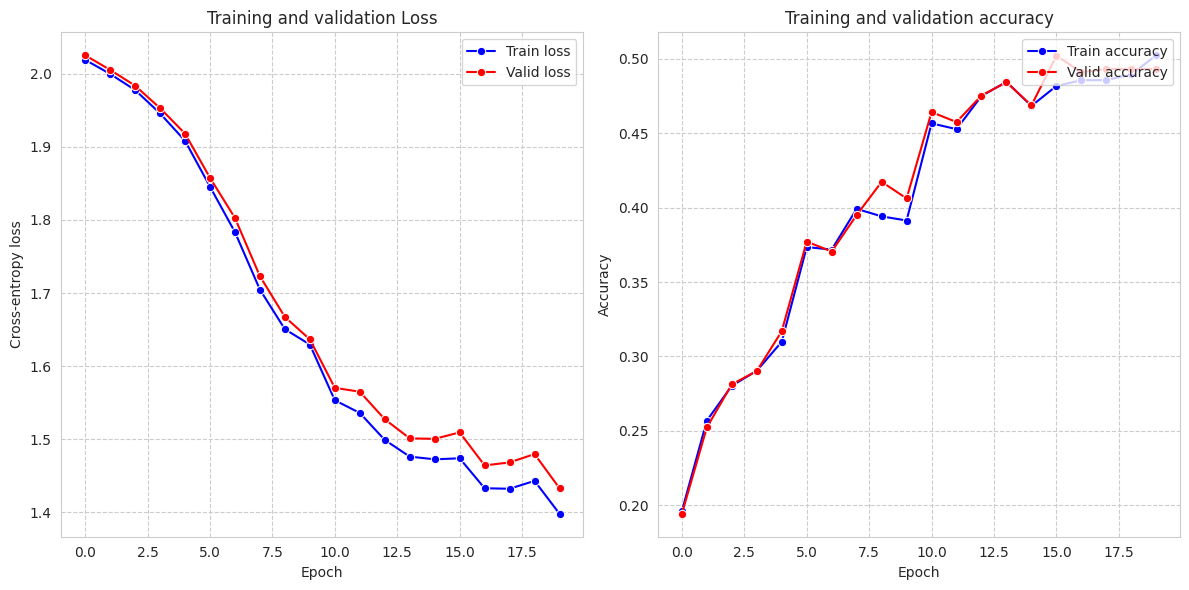

In [4]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-4
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 20

# Model arch
config.model_arch_depth = [8, 16, 32]
config.dropout_map = [0] * len(config.model_arch_depth)
config.dropout_fc = []

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation:**
- Train and test loss and accuracy are moving in parallel.
- Becasue the train accuracy is not maxed (or the loss dropped to 0), it is a sign of underfitting.
- I can try with increasing the learnign rate, run for more epochs, and increase the complexity of the model by adding more units.

**Baseline 2:** Overfit the model on train images
- Increased learning rate to 1e-3 and also trained for 200 epochs
- Included early stopping for the training to stop if the accuracy do not increase for 20 epoch in sequence.

set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 8771.55it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (fcs): Sequential(
    (0): Linear(in_features=15488, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=9, bias=True)
  )
)
Total number of train parameters: 1989785 or (1.99M)


Epoch 1/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.52it/s, batch_loss=1.974767, epoch_loss=2.044628, learning_rate=0.001]



>>> [2024-01-17 22:18:41.780727 | 1/200 | Early stopping counter 0] 
    loss          - train: 2.012581      valid: 2.014429 
    accuracy      - train: 0.195980      valid: 0.194196 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.90it/s, batch_loss=1.885648, epoch_loss=1.952946, learning_rate=0.001]



>>> [2024-01-17 22:18:46.652131 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.856511      valid: 1.855246 
    accuracy      - train: 0.350084      valid: 0.341518 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.60it/s, batch_loss=1.670946, epoch_loss=1.773256, learning_rate=0.001]



>>> [2024-01-17 22:18:54.925559 | 3/200 | Early stopping counter 0] 
    loss          - train: 1.578914      valid: 1.607062 
    accuracy      - train: 0.443328      valid: 0.433036 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.86it/s, batch_loss=1.643476, epoch_loss=1.627671, learning_rate=0.001]



>>> [2024-01-17 22:18:59.609763 | 4/200 | Early stopping counter 0] 
    loss          - train: 1.425668      valid: 1.466627 
    accuracy      - train: 0.512004      valid: 0.500000 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.29it/s, batch_loss=1.506454, epoch_loss=1.439798, learning_rate=0.001]



>>> [2024-01-17 22:19:04.416394 | 5/200 | Early stopping counter 0] 
    loss          - train: 1.387696      valid: 1.439090 
    accuracy      - train: 0.512563      valid: 0.513393 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.17it/s, batch_loss=1.318265, epoch_loss=1.408728, learning_rate=0.001]



>>> [2024-01-17 22:19:09.841355 | 6/200 | Early stopping counter 0] 
    loss          - train: 1.391239      valid: 1.454092 
    accuracy      - train: 0.528197      valid: 0.517857 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 23.08it/s, batch_loss=1.162340, epoch_loss=1.320774, learning_rate=0.001]



>>> [2024-01-17 22:19:14.502243 | 7/200 | Early stopping counter 1] 
    loss          - train: 1.424022      valid: 1.534733 
    accuracy      - train: 0.495254      valid: 0.491071 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.82it/s, batch_loss=1.373295, epoch_loss=1.338582, learning_rate=0.001]



>>> [2024-01-17 22:19:19.267394 | 8/200 | Early stopping counter 2] 
    loss          - train: 1.408334      valid: 1.527855 
    accuracy      - train: 0.499162      valid: 0.462054 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.01it/s, batch_loss=1.090857, epoch_loss=1.250205, learning_rate=0.001]



>>> [2024-01-17 22:19:24.694196 | 9/200 | Early stopping counter 0] 
    loss          - train: 1.144433      valid: 1.290944 
    accuracy      - train: 0.592406      valid: 0.560268 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.94it/s, batch_loss=1.282008, epoch_loss=1.166186, learning_rate=0.001]



>>> [2024-01-17 22:19:29.347965 | 10/200 | Early stopping counter 0] 
    loss          - train: 1.076533      valid: 1.251137 
    accuracy      - train: 0.623116      valid: 0.571429 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.67it/s, batch_loss=1.366475, epoch_loss=1.147750, learning_rate=0.001]



>>> [2024-01-17 22:19:34.195432 | 11/200 | Early stopping counter 1] 
    loss          - train: 1.052788      valid: 1.264952 
    accuracy      - train: 0.621441      valid: 0.562500 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.35it/s, batch_loss=0.748058, epoch_loss=1.074196, learning_rate=0.001]



>>> [2024-01-17 22:19:39.597820 | 12/200 | Early stopping counter 0] 
    loss          - train: 0.994977      valid: 1.253236 
    accuracy      - train: 0.650475      valid: 0.598214 
    learning rate        : 1.00000e-03



Epoch 13/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.79it/s, batch_loss=0.969394, epoch_loss=1.025746, learning_rate=0.001]



>>> [2024-01-17 22:19:44.282911 | 13/200 | Early stopping counter 1] 
    loss          - train: 0.986958      valid: 1.281168 
    accuracy      - train: 0.653266      valid: 0.562500 
    learning rate        : 1.00000e-03



Epoch 14/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.76it/s, batch_loss=0.913356, epoch_loss=0.978587, learning_rate=0.001]



>>> [2024-01-17 22:19:49.100060 | 14/200 | Early stopping counter 2] 
    loss          - train: 0.869491      valid: 1.213134 
    accuracy      - train: 0.702959      valid: 0.569196 
    learning rate        : 1.00000e-03



Epoch 15/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.22it/s, batch_loss=0.985825, epoch_loss=0.921364, learning_rate=0.001]



>>> [2024-01-17 22:19:54.453281 | 15/200 | Early stopping counter 3] 
    loss          - train: 1.025217      valid: 1.478755 
    accuracy      - train: 0.628699      valid: 0.533482 
    learning rate        : 1.00000e-03



Epoch 16/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 23.10it/s, batch_loss=0.892891, epoch_loss=0.916021, learning_rate=0.001]



>>> [2024-01-17 22:19:59.077017 | 16/200 | Early stopping counter 4] 
    loss          - train: 0.802734      valid: 1.277774 
    accuracy      - train: 0.711893      valid: 0.575893 
    learning rate        : 1.00000e-03



Epoch 17/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 22.60it/s, batch_loss=0.713979, epoch_loss=0.825205, learning_rate=0.001]



>>> [2024-01-17 22:20:03.892795 | 17/200 | Early stopping counter 5] 
    loss          - train: 0.729162      valid: 1.285711 
    accuracy      - train: 0.742044      valid: 0.573661 
    learning rate        : 1.00000e-03



Epoch 18/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.13it/s, batch_loss=0.841719, epoch_loss=0.791966, learning_rate=0.001]



>>> [2024-01-17 22:20:09.249728 | 18/200 | Early stopping counter 6] 
    loss          - train: 0.697003      valid: 1.295520 
    accuracy      - train: 0.746510      valid: 0.555804 
    learning rate        : 1.00000e-04



Epoch 19/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 22.89it/s, batch_loss=0.635221, epoch_loss=0.661185, learning_rate=0.0001]



>>> [2024-01-17 22:20:13.934586 | 19/200 | Early stopping counter 7] 
    loss          - train: 0.621546      valid: 1.286632 
    accuracy      - train: 0.786711      valid: 0.564732 
    learning rate        : 1.00000e-04



Epoch 20/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 22.96it/s, batch_loss=0.447546, epoch_loss=0.619262, learning_rate=0.0001]



>>> [2024-01-17 22:20:18.748971 | 20/200 | Early stopping counter 8] 
    loss          - train: 0.599399      valid: 1.298813 
    accuracy      - train: 0.790620      valid: 0.578125 
    learning rate        : 1.00000e-04



Epoch 21/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.31it/s, batch_loss=0.777792, epoch_loss=0.600375, learning_rate=0.0001]



>>> [2024-01-17 22:20:24.061483 | 21/200 | Early stopping counter 9] 
    loss          - train: 0.585470      valid: 1.300823 
    accuracy      - train: 0.798995      valid: 0.578125 
    learning rate        : 1.00000e-04



Epoch 22/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 22.86it/s, batch_loss=0.590333, epoch_loss=0.585839, learning_rate=0.0001]



>>> [2024-01-17 22:20:28.691311 | 22/200 | Early stopping counter 10] 
    loss          - train: 0.575566      valid: 1.307311 
    accuracy      - train: 0.801787      valid: 0.562500 
    learning rate        : 1.00000e-04



Epoch 23/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 22.84it/s, batch_loss=0.709547, epoch_loss=0.576231, learning_rate=0.0001]



>>> [2024-01-17 22:20:33.831841 | 23/200 | Early stopping counter 11] 
    loss          - train: 0.558447      valid: 1.321374 
    accuracy      - train: 0.806812      valid: 0.575893 
    learning rate        : 1.00000e-04



Epoch 24/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 18.61it/s, batch_loss=0.733194, epoch_loss=0.565863, learning_rate=0.0001]



>>> [2024-01-17 22:20:39.189932 | 24/200 | Early stopping counter 12] 
    loss          - train: 0.550503      valid: 1.341171 
    accuracy      - train: 0.806812      valid: 0.573661 
    learning rate        : 1.00000e-05



Epoch 25/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.91it/s, batch_loss=0.405181, epoch_loss=0.550187, learning_rate=1e-5]



>>> [2024-01-17 22:20:43.857679 | 25/200 | Early stopping counter 13] 
    loss          - train: 0.546411      valid: 1.338702 
    accuracy      - train: 0.807370      valid: 0.569196 
    learning rate        : 1.00000e-05



Epoch 26/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.81it/s, batch_loss=0.826178, epoch_loss=0.547781, learning_rate=1e-5]



>>> [2024-01-17 22:20:48.757036 | 26/200 | Early stopping counter 14] 
    loss          - train: 0.545209      valid: 1.341672 
    accuracy      - train: 0.807929      valid: 0.571429 
    learning rate        : 1.00000e-05



Epoch 27/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.28it/s, batch_loss=0.462214, epoch_loss=0.546121, learning_rate=1e-5]



>>> [2024-01-17 22:20:54.006905 | 27/200 | Early stopping counter 15] 
    loss          - train: 0.544215      valid: 1.340783 
    accuracy      - train: 0.807370      valid: 0.575893 
    learning rate        : 1.00000e-05



Epoch 28/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.94it/s, batch_loss=0.594612, epoch_loss=0.546106, learning_rate=1e-5]



>>> [2024-01-17 22:20:58.644502 | 28/200 | Early stopping counter 16] 
    loss          - train: 0.543109      valid: 1.343879 
    accuracy      - train: 0.809045      valid: 0.573661 
    learning rate        : 1.00000e-05



Epoch 29/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.82it/s, batch_loss=0.825270, epoch_loss=0.544673, learning_rate=1e-5]



>>> [2024-01-17 22:21:03.555394 | 29/200 | Early stopping counter 17] 
    loss          - train: 0.542390      valid: 1.344458 
    accuracy      - train: 0.810162      valid: 0.573661 
    learning rate        : 1.00000e-05



Epoch 30/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.48it/s, batch_loss=0.458393, epoch_loss=0.543304, learning_rate=1e-5]



>>> [2024-01-17 22:21:09.416589 | 30/200 | Early stopping counter 18] 
    loss          - train: 0.541176      valid: 1.344509 
    accuracy      - train: 0.809045      valid: 0.571429 
    learning rate        : 1.00000e-06



Epoch 31/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.68it/s, batch_loss=0.478309, epoch_loss=0.541380, learning_rate=1e-6]



>>> [2024-01-17 22:21:14.495619 | 31/200 | Early stopping counter 19] 
    loss          - train: 0.541105      valid: 1.344651 
    accuracy      - train: 0.809045      valid: 0.573661 
    learning rate        : 1.00000e-06



Epoch 32/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.96it/s, batch_loss=0.427573, epoch_loss=0.541251, learning_rate=1e-6]



>>> [2024-01-17 22:21:19.497834 | 32/200 | Early stopping counter 20] 
    loss          - train: 0.540991      valid: 1.344873 
    accuracy      - train: 0.809604      valid: 0.573661 
    learning rate        : 1.00000e-06



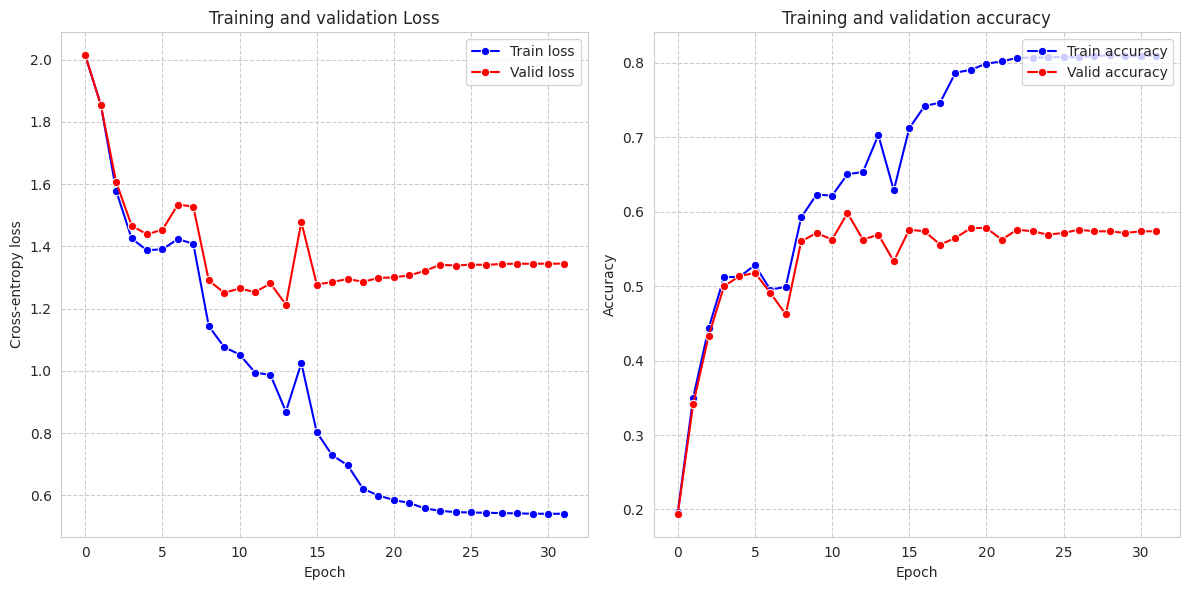

In [5]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [8, 16, 32]
config.dropout_map = [0] * len(config.model_arch_depth)
config.dropout_fc = []

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation:**
- With increasing the learning and training for longer epochs, the model started to overfit.
- Validation accuracy increased from 0.502 to 0.571
- Learning rate lower than 1e-5 have no affect on the model performance. Because the it takes only 2 seconds to train an epoch, I left the early stopping to 20.

**Baseline 3:** Overfit the model on train images
- Increased learning rate to 1e-3 and also trained for 200 epochs
- Included early stopping for the training to stop if the accuracy do not increase for 20 epoch in sequence.
- Increase the complexity of the model arch. by increasing units in the 3-convnets from [8, 16, 32] to [12, 24, 48]

set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 9197.63it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (fcs): Sequential(
    (0): Linear(in_features=23232, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=9, bias=True)
  )
)
Total number of train parameters: 2988353 or (2.99M)


Epoch 1/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 18.73it/s, batch_loss=1.736360, epoch_loss=1.987638, learning_rate=0.001]



>>> [2024-01-17 22:21:26.891191 | 1/200 | Early stopping counter 0] 
    loss          - train: 1.835180      valid: 1.848245 
    accuracy      - train: 0.352875      valid: 0.359375 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 22.62it/s, batch_loss=1.530234, epoch_loss=1.671488, learning_rate=0.001]



>>> [2024-01-17 22:21:31.665463 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.455623      valid: 1.498012 
    accuracy      - train: 0.485204      valid: 0.473214 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.34it/s, batch_loss=1.333628, epoch_loss=1.473336, learning_rate=0.001]



>>> [2024-01-17 22:21:37.492746 | 3/200 | Early stopping counter 1] 
    loss          - train: 1.719350      valid: 1.783524 
    accuracy      - train: 0.414294      valid: 0.430804 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.05it/s, batch_loss=1.570238, epoch_loss=1.427542, learning_rate=0.001]



>>> [2024-01-17 22:21:42.494648 | 4/200 | Early stopping counter 0] 
    loss          - train: 1.301220      valid: 1.400536 
    accuracy      - train: 0.539363      valid: 0.531250 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.01it/s, batch_loss=1.776351, epoch_loss=1.310562, learning_rate=0.001]



>>> [2024-01-17 22:21:47.604514 | 5/200 | Early stopping counter 1] 
    loss          - train: 1.246227      valid: 1.359700 
    accuracy      - train: 0.560022      valid: 0.515625 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.76it/s, batch_loss=1.334457, epoch_loss=1.245382, learning_rate=0.001]



>>> [2024-01-17 22:21:53.299407 | 6/200 | Early stopping counter 0] 
    loss          - train: 1.148286      valid: 1.294386 
    accuracy      - train: 0.599107      valid: 0.564732 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 21.11it/s, batch_loss=1.255244, epoch_loss=1.262013, learning_rate=0.001]



>>> [2024-01-17 22:21:58.309203 | 7/200 | Early stopping counter 1] 
    loss          - train: 1.209642      valid: 1.369087 
    accuracy      - train: 0.566164      valid: 0.511161 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.83it/s, batch_loss=0.930764, epoch_loss=1.205487, learning_rate=0.001]



>>> [2024-01-17 22:22:03.702977 | 8/200 | Early stopping counter 2] 
    loss          - train: 1.105725      valid: 1.294826 
    accuracy      - train: 0.613624      valid: 0.540179 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.73it/s, batch_loss=0.888221, epoch_loss=1.066472, learning_rate=0.001]



>>> [2024-01-17 22:22:09.262151 | 9/200 | Early stopping counter 3] 
    loss          - train: 0.977827      valid: 1.318415 
    accuracy      - train: 0.658291      valid: 0.549107 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 21.11it/s, batch_loss=0.747096, epoch_loss=1.038447, learning_rate=0.001]



>>> [2024-01-17 22:22:14.223064 | 10/200 | Early stopping counter 4] 
    loss          - train: 0.953064      valid: 1.325855 
    accuracy      - train: 0.676159      valid: 0.537946 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.20it/s, batch_loss=1.103378, epoch_loss=0.984630, learning_rate=0.001]



>>> [2024-01-17 22:22:19.889091 | 11/200 | Early stopping counter 5] 
    loss          - train: 0.858916      valid: 1.299783 
    accuracy      - train: 0.702401      valid: 0.533482 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.78it/s, batch_loss=0.634795, epoch_loss=0.896242, learning_rate=0.001]



>>> [2024-01-17 22:22:25.101285 | 12/200 | Early stopping counter 6] 
    loss          - train: 0.812908      valid: 1.392947 
    accuracy      - train: 0.722501      valid: 0.555804 
    learning rate        : 1.00000e-04



Epoch 13/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.80it/s, batch_loss=0.630001, epoch_loss=0.742004, learning_rate=0.0001]



>>> [2024-01-17 22:22:30.132680 | 13/200 | Early stopping counter 7] 
    loss          - train: 0.695502      valid: 1.320513 
    accuracy      - train: 0.759352      valid: 0.562500 
    learning rate        : 1.00000e-04



Epoch 14/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 18.32it/s, batch_loss=0.603544, epoch_loss=0.695419, learning_rate=0.0001]



>>> [2024-01-17 22:22:35.934978 | 14/200 | Early stopping counter 0] 
    loss          - train: 0.667768      valid: 1.344009 
    accuracy      - train: 0.764936      valid: 0.564732 
    learning rate        : 1.00000e-04



Epoch 15/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.56it/s, batch_loss=0.449918, epoch_loss=0.677347, learning_rate=0.0001]



>>> [2024-01-17 22:22:41.026701 | 15/200 | Early stopping counter 0] 
    loss          - train: 0.650804      valid: 1.351535 
    accuracy      - train: 0.772194      valid: 0.566964 
    learning rate        : 1.00000e-04



Epoch 16/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.76it/s, batch_loss=0.753135, epoch_loss=0.657689, learning_rate=0.0001]



>>> [2024-01-17 22:22:46.208438 | 16/200 | Early stopping counter 1] 
    loss          - train: 0.636904      valid: 1.356789 
    accuracy      - train: 0.781686      valid: 0.555804 
    learning rate        : 1.00000e-04



Epoch 17/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.17it/s, batch_loss=0.787487, epoch_loss=0.641453, learning_rate=0.0001]



>>> [2024-01-17 22:22:51.925527 | 17/200 | Early stopping counter 2] 
    loss          - train: 0.622453      valid: 1.361692 
    accuracy      - train: 0.783920      valid: 0.564732 
    learning rate        : 1.00000e-04



Epoch 18/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.94it/s, batch_loss=0.852120, epoch_loss=0.633433, learning_rate=0.0001]



>>> [2024-01-17 22:22:56.917884 | 18/200 | Early stopping counter 3] 
    loss          - train: 0.614311      valid: 1.389310 
    accuracy      - train: 0.786711      valid: 0.564732 
    learning rate        : 1.00000e-04



Epoch 19/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.92it/s, batch_loss=0.533411, epoch_loss=0.618445, learning_rate=0.0001]



>>> [2024-01-17 22:23:02.310312 | 19/200 | Early stopping counter 4] 
    loss          - train: 0.598163      valid: 1.421310 
    accuracy      - train: 0.792295      valid: 0.562500 
    learning rate        : 1.00000e-04



Epoch 20/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 18.03it/s, batch_loss=0.977840, epoch_loss=0.606847, learning_rate=0.0001]



>>> [2024-01-17 22:23:07.743611 | 20/200 | Early stopping counter 5] 
    loss          - train: 0.592618      valid: 1.425824 
    accuracy      - train: 0.792295      valid: 0.546875 
    learning rate        : 1.00000e-04



Epoch 21/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 21.23it/s, batch_loss=0.789160, epoch_loss=0.593471, learning_rate=0.0001]



>>> [2024-01-17 22:23:12.694306 | 21/200 | Early stopping counter 6] 
    loss          - train: 0.576930      valid: 1.441216 
    accuracy      - train: 0.797320      valid: 0.555804 
    learning rate        : 1.00000e-05



Epoch 22/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.27it/s, batch_loss=0.788272, epoch_loss=0.574972, learning_rate=1e-5]



>>> [2024-01-17 22:23:18.317797 | 22/200 | Early stopping counter 7] 
    loss          - train: 0.570215      valid: 1.430490 
    accuracy      - train: 0.804578      valid: 0.546875 
    learning rate        : 1.00000e-05



Epoch 23/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.26it/s, batch_loss=0.721161, epoch_loss=0.570481, learning_rate=1e-5]



>>> [2024-01-17 22:23:23.599116 | 23/200 | Early stopping counter 8] 
    loss          - train: 0.567793      valid: 1.431544 
    accuracy      - train: 0.802345      valid: 0.551339 
    learning rate        : 1.00000e-05



Epoch 24/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.36it/s, batch_loss=0.295554, epoch_loss=0.568929, learning_rate=1e-5]



>>> [2024-01-17 22:23:28.734260 | 24/200 | Early stopping counter 9] 
    loss          - train: 0.565863      valid: 1.431479 
    accuracy      - train: 0.805137      valid: 0.549107 
    learning rate        : 1.00000e-05



Epoch 25/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.28it/s, batch_loss=0.616335, epoch_loss=0.567783, learning_rate=1e-5]



>>> [2024-01-17 22:23:34.594346 | 25/200 | Early stopping counter 10] 
    loss          - train: 0.564519      valid: 1.434378 
    accuracy      - train: 0.804578      valid: 0.549107 
    learning rate        : 1.00000e-05



Epoch 26/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.84it/s, batch_loss=0.536278, epoch_loss=0.566279, learning_rate=1e-5]



>>> [2024-01-17 22:23:39.591316 | 26/200 | Early stopping counter 11] 
    loss          - train: 0.563161      valid: 1.433647 
    accuracy      - train: 0.805137      valid: 0.551339 
    learning rate        : 1.00000e-05



Epoch 27/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.78it/s, batch_loss=0.311501, epoch_loss=0.564637, learning_rate=1e-5]



>>> [2024-01-17 22:23:44.761063 | 27/200 | Early stopping counter 12] 
    loss          - train: 0.562117      valid: 1.436241 
    accuracy      - train: 0.804020      valid: 0.551339 
    learning rate        : 1.00000e-06



Epoch 28/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.47it/s, batch_loss=0.629281, epoch_loss=0.562281, learning_rate=1e-6]



>>> [2024-01-17 22:23:50.555267 | 28/200 | Early stopping counter 13] 
    loss          - train: 0.561794      valid: 1.436574 
    accuracy      - train: 0.803462      valid: 0.549107 
    learning rate        : 1.00000e-06



Epoch 29/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.90it/s, batch_loss=0.765801, epoch_loss=0.562123, learning_rate=1e-6]



>>> [2024-01-17 22:23:56.386056 | 29/200 | Early stopping counter 14] 
    loss          - train: 0.561659      valid: 1.436647 
    accuracy      - train: 0.804578      valid: 0.549107 
    learning rate        : 1.00000e-06



Epoch 30/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.84it/s, batch_loss=0.622262, epoch_loss=0.561850, learning_rate=1e-6]



>>> [2024-01-17 22:24:01.936238 | 30/200 | Early stopping counter 15] 
    loss          - train: 0.561478      valid: 1.436839 
    accuracy      - train: 0.804020      valid: 0.551339 
    learning rate        : 1.00000e-06



Epoch 31/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 18.67it/s, batch_loss=0.613632, epoch_loss=0.561717, learning_rate=1e-6]



>>> [2024-01-17 22:24:07.303071 | 31/200 | Early stopping counter 16] 
    loss          - train: 0.561406      valid: 1.436895 
    accuracy      - train: 0.804020      valid: 0.551339 
    learning rate        : 1.00000e-06



Epoch 32/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.57it/s, batch_loss=0.418904, epoch_loss=0.561603, learning_rate=1e-6]



>>> [2024-01-17 22:24:12.356992 | 32/200 | Early stopping counter 17] 
    loss          - train: 0.561297      valid: 1.436976 
    accuracy      - train: 0.804020      valid: 0.551339 
    learning rate        : 1.00000e-06



Epoch 33/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.26it/s, batch_loss=0.637017, epoch_loss=0.561437, learning_rate=1e-6]



>>> [2024-01-17 22:24:18.206595 | 33/200 | Early stopping counter 18] 
    loss          - train: 0.561171      valid: 1.436978 
    accuracy      - train: 0.804578      valid: 0.551339 
    learning rate        : 1.00000e-07



Epoch 34/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.40it/s, batch_loss=0.540486, epoch_loss=0.561110, learning_rate=1e-7]



>>> [2024-01-17 22:24:23.340115 | 34/200 | Early stopping counter 19] 
    loss          - train: 0.561065      valid: 1.436986 
    accuracy      - train: 0.804578      valid: 0.551339 
    learning rate        : 1.00000e-07



Epoch 35/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.66it/s, batch_loss=0.521985, epoch_loss=0.561116, learning_rate=1e-7]



>>> [2024-01-17 22:24:28.415327 | 35/200 | Early stopping counter 20] 
    loss          - train: 0.561065      valid: 1.436965 
    accuracy      - train: 0.804578      valid: 0.551339 
    learning rate        : 1.00000e-07



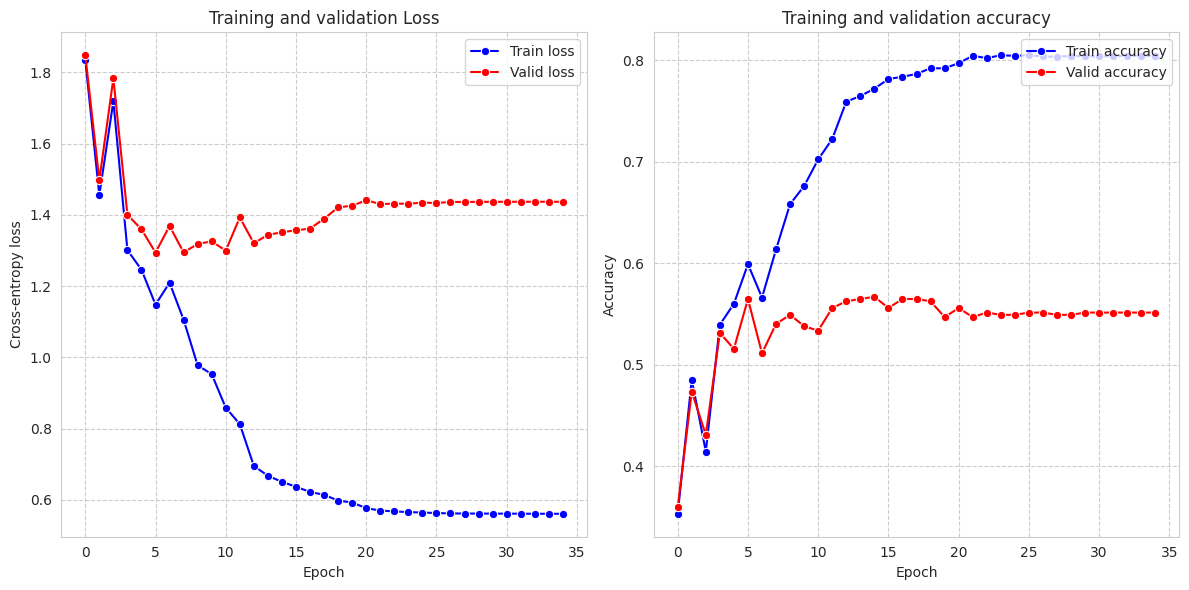

In [6]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [12, 24, 48]
config.dropout_map = [0] * len(config.model_arch_depth)
config.dropout_fc = []

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation:**
- With increasing the learning and training for longer epochs, the model overfitted on train images more.
- Validation accuracy dropped from 0.571 to 0.564

**Baseline 4:** Introduce dropout to reduce overfitting
- With same model arch, introduce dropouts of [0, 0.1, 0.2] after 3 convnets, and 0.2 each in the fully connected layers.

set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 8955.41it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.1, inplace=False)
    (7): Conv2d(24, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Dropout(p=0.2, inplace=False)
    (11): Flatten(start_dim=1, end_dim=-1)
  )
  (fcs): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Linear(in_features=23232, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=

Epoch 1/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.87it/s, batch_loss=1.859548, epoch_loss=2.014140, learning_rate=0.001]



>>> [2024-01-17 22:24:35.945250 | 1/200 | Early stopping counter 0] 
    loss          - train: 1.963527      valid: 1.972207 
    accuracy      - train: 0.291457      valid: 0.267857 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.70it/s, batch_loss=1.661050, epoch_loss=1.799206, learning_rate=0.001]



>>> [2024-01-17 22:24:41.163947 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.640959      valid: 1.655065 
    accuracy      - train: 0.404802      valid: 0.415179 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.19it/s, batch_loss=1.622850, epoch_loss=1.593517, learning_rate=0.001]



>>> [2024-01-17 22:24:47.136085 | 3/200 | Early stopping counter 0] 
    loss          - train: 1.506980      valid: 1.538389 
    accuracy      - train: 0.490229      valid: 0.450893 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.48it/s, batch_loss=1.313345, epoch_loss=1.446275, learning_rate=0.001]



>>> [2024-01-17 22:24:52.340661 | 4/200 | Early stopping counter 0] 
    loss          - train: 1.347983      valid: 1.394289 
    accuracy      - train: 0.529872      valid: 0.506696 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.93it/s, batch_loss=1.560098, epoch_loss=1.460034, learning_rate=0.001]



>>> [2024-01-17 22:24:57.356284 | 5/200 | Early stopping counter 0] 
    loss          - train: 1.304572      valid: 1.357870 
    accuracy      - train: 0.553881      valid: 0.546875 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.42it/s, batch_loss=1.413494, epoch_loss=1.398557, learning_rate=0.001]



>>> [2024-01-17 22:25:03.176662 | 6/200 | Early stopping counter 1] 
    loss          - train: 1.297424      valid: 1.372051 
    accuracy      - train: 0.546622      valid: 0.524554 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.21it/s, batch_loss=1.372277, epoch_loss=1.324019, learning_rate=0.001]



>>> [2024-01-17 22:25:08.681384 | 7/200 | Early stopping counter 2] 
    loss          - train: 1.211067      valid: 1.312795 
    accuracy      - train: 0.573423      valid: 0.531250 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.90it/s, batch_loss=1.551147, epoch_loss=1.322651, learning_rate=0.001]



>>> [2024-01-17 22:25:13.945455 | 8/200 | Early stopping counter 3] 
    loss          - train: 1.331902      valid: 1.439057 
    accuracy      - train: 0.521496      valid: 0.502232 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.89it/s, batch_loss=1.139066, epoch_loss=1.241344, learning_rate=0.001]



>>> [2024-01-17 22:25:19.552356 | 9/200 | Early stopping counter 4] 
    loss          - train: 1.170601      valid: 1.318596 
    accuracy      - train: 0.597432      valid: 0.540179 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.00it/s, batch_loss=1.462676, epoch_loss=1.206486, learning_rate=0.001]



>>> [2024-01-17 22:25:24.690748 | 10/200 | Early stopping counter 0] 
    loss          - train: 1.099314      valid: 1.275024 
    accuracy      - train: 0.626466      valid: 0.564732 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.78it/s, batch_loss=1.105338, epoch_loss=1.162113, learning_rate=0.001]



>>> [2024-01-17 22:25:30.233103 | 11/200 | Early stopping counter 1] 
    loss          - train: 1.059989      valid: 1.319477 
    accuracy      - train: 0.615299      valid: 0.540179 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.60it/s, batch_loss=1.127213, epoch_loss=1.115343, learning_rate=0.001]



>>> [2024-01-17 22:25:35.564699 | 12/200 | Early stopping counter 0] 
    loss          - train: 0.990132      valid: 1.239341 
    accuracy      - train: 0.671133      valid: 0.569196 
    learning rate        : 1.00000e-03



Epoch 13/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.81it/s, batch_loss=1.661641, epoch_loss=1.079569, learning_rate=0.001]



>>> [2024-01-17 22:25:40.621615 | 13/200 | Early stopping counter 1] 
    loss          - train: 0.972709      valid: 1.278770 
    accuracy      - train: 0.657733      valid: 0.553571 
    learning rate        : 1.00000e-03



Epoch 14/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.52it/s, batch_loss=1.261272, epoch_loss=1.089509, learning_rate=0.001]



>>> [2024-01-17 22:25:46.327364 | 14/200 | Early stopping counter 2] 
    loss          - train: 0.954564      valid: 1.258621 
    accuracy      - train: 0.669458      valid: 0.566964 
    learning rate        : 1.00000e-03



Epoch 15/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.11it/s, batch_loss=1.047551, epoch_loss=1.042506, learning_rate=0.001]



>>> [2024-01-17 22:25:51.461436 | 15/200 | Early stopping counter 3] 
    loss          - train: 0.883797      valid: 1.261843 
    accuracy      - train: 0.696259      valid: 0.566964 
    learning rate        : 1.00000e-03



Epoch 16/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 21.11it/s, batch_loss=1.027008, epoch_loss=0.948270, learning_rate=0.001]



>>> [2024-01-17 22:25:56.429804 | 16/200 | Early stopping counter 4] 
    loss          - train: 0.826339      valid: 1.294006 
    accuracy      - train: 0.713009      valid: 0.555804 
    learning rate        : 1.00000e-03



Epoch 17/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.99it/s, batch_loss=0.940570, epoch_loss=0.946393, learning_rate=0.001]



>>> [2024-01-17 22:26:02.262565 | 17/200 | Early stopping counter 5] 
    loss          - train: 0.815929      valid: 1.391212 
    accuracy      - train: 0.706309      valid: 0.524554 
    learning rate        : 1.00000e-03



Epoch 18/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.70it/s, batch_loss=0.611443, epoch_loss=0.941795, learning_rate=0.001]



>>> [2024-01-17 22:26:07.274502 | 18/200 | Early stopping counter 0] 
    loss          - train: 0.778363      valid: 1.305870 
    accuracy      - train: 0.721385      valid: 0.584821 
    learning rate        : 1.00000e-03



Epoch 19/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.71it/s, batch_loss=0.931538, epoch_loss=0.851210, learning_rate=0.001]



>>> [2024-01-17 22:26:12.476888 | 19/200 | Early stopping counter 1] 
    loss          - train: 0.725047      valid: 1.322925 
    accuracy      - train: 0.752652      valid: 0.555804 
    learning rate        : 1.00000e-03



Epoch 20/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.55it/s, batch_loss=0.987663, epoch_loss=0.828339, learning_rate=0.001]



>>> [2024-01-17 22:26:18.167252 | 20/200 | Early stopping counter 2] 
    loss          - train: 0.708207      valid: 1.329608 
    accuracy      - train: 0.733668      valid: 0.575893 
    learning rate        : 1.00000e-03



Epoch 21/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.67it/s, batch_loss=0.889765, epoch_loss=0.844093, learning_rate=0.001]



>>> [2024-01-17 22:26:23.364740 | 21/200 | Early stopping counter 3] 
    loss          - train: 0.699504      valid: 1.431274 
    accuracy      - train: 0.730318      valid: 0.555804 
    learning rate        : 1.00000e-03



Epoch 22/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.59it/s, batch_loss=0.738643, epoch_loss=0.799265, learning_rate=0.001]



>>> [2024-01-17 22:26:28.853091 | 22/200 | Early stopping counter 4] 
    loss          - train: 0.595776      valid: 1.454111 
    accuracy      - train: 0.791178      valid: 0.546875 
    learning rate        : 1.00000e-03



Epoch 23/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.47it/s, batch_loss=0.701275, epoch_loss=0.731708, learning_rate=0.001]



>>> [2024-01-17 22:26:34.448890 | 23/200 | Early stopping counter 5] 
    loss          - train: 0.586969      valid: 1.446594 
    accuracy      - train: 0.792853      valid: 0.555804 
    learning rate        : 1.00000e-03



Epoch 24/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.33it/s, batch_loss=0.598594, epoch_loss=0.740899, learning_rate=0.001]



>>> [2024-01-17 22:26:40.129829 | 24/200 | Early stopping counter 6] 
    loss          - train: 0.735658      valid: 1.479088 
    accuracy      - train: 0.745394      valid: 0.513393 
    learning rate        : 1.00000e-04



Epoch 25/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 18.37it/s, batch_loss=0.682339, epoch_loss=0.666127, learning_rate=0.0001]



>>> [2024-01-17 22:26:45.951735 | 25/200 | Early stopping counter 7] 
    loss          - train: 0.489308      valid: 1.376828 
    accuracy      - train: 0.835288      valid: 0.569196 
    learning rate        : 1.00000e-04



Epoch 26/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.69it/s, batch_loss=0.374525, epoch_loss=0.583535, learning_rate=0.0001]



>>> [2024-01-17 22:26:50.986953 | 26/200 | Early stopping counter 8] 
    loss          - train: 0.464148      valid: 1.386515 
    accuracy      - train: 0.843104      valid: 0.571429 
    learning rate        : 1.00000e-04



Epoch 27/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.46it/s, batch_loss=0.476838, epoch_loss=0.591438, learning_rate=0.0001]



>>> [2024-01-17 22:26:56.138452 | 27/200 | Early stopping counter 9] 
    loss          - train: 0.453182      valid: 1.412211 
    accuracy      - train: 0.845338      valid: 0.571429 
    learning rate        : 1.00000e-04



Epoch 28/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.55it/s, batch_loss=0.369613, epoch_loss=0.542357, learning_rate=0.0001]



>>> [2024-01-17 22:27:01.895597 | 28/200 | Early stopping counter 10] 
    loss          - train: 0.439911      valid: 1.427065 
    accuracy      - train: 0.845896      valid: 0.553571 
    learning rate        : 1.00000e-04



Epoch 29/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.49it/s, batch_loss=0.687595, epoch_loss=0.547722, learning_rate=0.0001]



>>> [2024-01-17 22:27:06.997393 | 29/200 | Early stopping counter 11] 
    loss          - train: 0.439346      valid: 1.417903 
    accuracy      - train: 0.853713      valid: 0.569196 
    learning rate        : 1.00000e-04



Epoch 30/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.55it/s, batch_loss=0.526174, epoch_loss=0.559557, learning_rate=0.0001]



>>> [2024-01-17 22:27:12.424979 | 30/200 | Early stopping counter 12] 
    loss          - train: 0.423386      valid: 1.436552 
    accuracy      - train: 0.859855      valid: 0.558036 
    learning rate        : 1.00000e-05



Epoch 31/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.99it/s, batch_loss=0.693441, epoch_loss=0.534164, learning_rate=1e-5]



>>> [2024-01-17 22:27:17.866856 | 31/200 | Early stopping counter 13] 
    loss          - train: 0.420762      valid: 1.440861 
    accuracy      - train: 0.857621      valid: 0.558036 
    learning rate        : 1.00000e-05



Epoch 32/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.75it/s, batch_loss=0.599184, epoch_loss=0.543242, learning_rate=1e-5]



>>> [2024-01-17 22:27:22.912043 | 32/200 | Early stopping counter 14] 
    loss          - train: 0.420705      valid: 1.439457 
    accuracy      - train: 0.857621      valid: 0.564732 
    learning rate        : 1.00000e-05



Epoch 33/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.03it/s, batch_loss=0.755655, epoch_loss=0.538274, learning_rate=1e-5]



>>> [2024-01-17 22:27:28.588043 | 33/200 | Early stopping counter 15] 
    loss          - train: 0.419019      valid: 1.441174 
    accuracy      - train: 0.858180      valid: 0.566964 
    learning rate        : 1.00000e-05



Epoch 34/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.41it/s, batch_loss=0.648683, epoch_loss=0.530669, learning_rate=1e-5]



>>> [2024-01-17 22:27:33.787979 | 34/200 | Early stopping counter 16] 
    loss          - train: 0.417583      valid: 1.445211 
    accuracy      - train: 0.858738      valid: 0.564732 
    learning rate        : 1.00000e-05



Epoch 35/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.70it/s, batch_loss=0.555963, epoch_loss=0.534842, learning_rate=1e-5]



>>> [2024-01-17 22:27:38.819340 | 35/200 | Early stopping counter 17] 
    loss          - train: 0.417778      valid: 1.445269 
    accuracy      - train: 0.858180      valid: 0.564732 
    learning rate        : 1.00000e-05



Epoch 36/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.48it/s, batch_loss=0.455291, epoch_loss=0.533599, learning_rate=1e-5]



>>> [2024-01-17 22:27:44.623631 | 36/200 | Early stopping counter 18] 
    loss          - train: 0.417071      valid: 1.443468 
    accuracy      - train: 0.859296      valid: 0.562500 
    learning rate        : 1.00000e-06



Epoch 37/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.76it/s, batch_loss=0.485896, epoch_loss=0.517964, learning_rate=1e-6]



>>> [2024-01-17 22:27:49.677866 | 37/200 | Early stopping counter 19] 
    loss          - train: 0.416910      valid: 1.443950 
    accuracy      - train: 0.858738      valid: 0.562500 
    learning rate        : 1.00000e-06



Epoch 38/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.74it/s, batch_loss=0.651064, epoch_loss=0.516712, learning_rate=1e-6]



>>> [2024-01-17 22:27:54.831082 | 38/200 | Early stopping counter 20] 
    loss          - train: 0.416340      valid: 1.445177 
    accuracy      - train: 0.858738      valid: 0.562500 
    learning rate        : 1.00000e-06



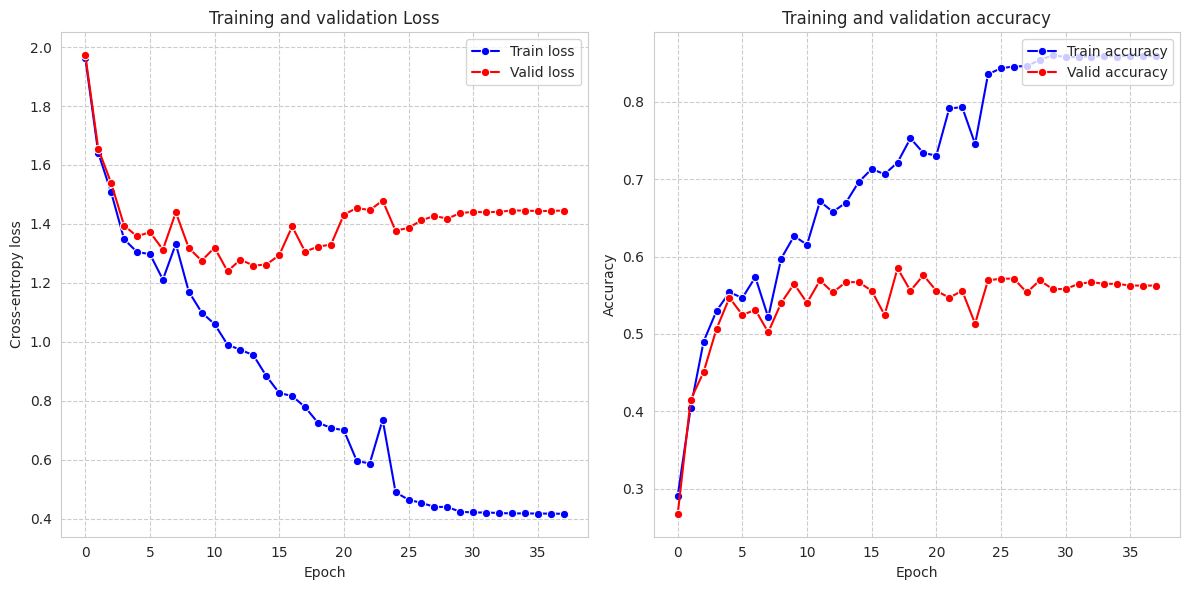

In [7]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [12, 24, 48]
config.dropout_map = [0, 0.1, 0.2]
config.dropout_fc = [0.1, 0.2]

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation:**
- With introducing dropouts, the validation accuracy increased from 0.571 (baseline 2) to 0.585.

**Baseline 5:** Increase complexity of the model
- Increase complexity from [12, 24, 48] to [16, 32, 64, 128] with corresponding dropout prob. [0, 0, 0.1, 0.2].
- Added additional convolution layer.

set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 9213.75it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.1, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Dropout(p=0.2, inplace=False)
    (14): Flatten(start_dim=1, end_dim=-1)
  )
  (fcs): Sequential(
    (0): Dropout(p=0.1, i

Epoch 1/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.31it/s, batch_loss=1.879237, epoch_loss=2.018050, learning_rate=0.001]



>>> [2024-01-17 22:28:03.121949 | 1/200 | Early stopping counter 0] 
    loss          - train: 1.888823      valid: 1.888048 
    accuracy      - train: 0.301508      valid: 0.296875 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 23.04it/s, batch_loss=1.703117, epoch_loss=1.823501, learning_rate=0.001]



>>> [2024-01-17 22:28:07.876867 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.681494      valid: 1.696116 
    accuracy      - train: 0.359017      valid: 0.348214 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.27it/s, batch_loss=1.325180, epoch_loss=1.622593, learning_rate=0.001]



>>> [2024-01-17 22:28:13.909463 | 3/200 | Early stopping counter 0] 
    loss          - train: 1.454943      valid: 1.484378 
    accuracy      - train: 0.484087      valid: 0.455357 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.15it/s, batch_loss=1.847991, epoch_loss=1.506762, learning_rate=0.001]



>>> [2024-01-17 22:28:19.092695 | 4/200 | Early stopping counter 0] 
    loss          - train: 1.439250      valid: 1.441950 
    accuracy      - train: 0.462870      valid: 0.464286 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.26it/s, batch_loss=1.875575, epoch_loss=1.414046, learning_rate=0.001]



>>> [2024-01-17 22:28:24.343924 | 5/200 | Early stopping counter 0] 
    loss          - train: 1.315774      valid: 1.367045 
    accuracy      - train: 0.511446      valid: 0.500000 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.88it/s, batch_loss=1.572652, epoch_loss=1.414285, learning_rate=0.001]



>>> [2024-01-17 22:28:30.255477 | 6/200 | Early stopping counter 0] 
    loss          - train: 1.255508      valid: 1.298127 
    accuracy      - train: 0.558906      valid: 0.551339 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.10it/s, batch_loss=1.496287, epoch_loss=1.284938, learning_rate=0.001]



>>> [2024-01-17 22:28:35.438782 | 7/200 | Early stopping counter 1] 
    loss          - train: 1.256903      valid: 1.301815 
    accuracy      - train: 0.541039      valid: 0.529018 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.03it/s, batch_loss=1.426954, epoch_loss=1.266988, learning_rate=0.001]



>>> [2024-01-17 22:28:41.104699 | 8/200 | Early stopping counter 0] 
    loss          - train: 1.123645      valid: 1.229409 
    accuracy      - train: 0.596315      valid: 0.562500 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.93it/s, batch_loss=1.323312, epoch_loss=1.205783, learning_rate=0.001]



>>> [2024-01-17 22:28:46.646303 | 9/200 | Early stopping counter 1] 
    loss          - train: 1.137143      valid: 1.237550 
    accuracy      - train: 0.592406      valid: 0.553571 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.76it/s, batch_loss=1.158162, epoch_loss=1.165539, learning_rate=0.001]



>>> [2024-01-17 22:28:51.919514 | 10/200 | Early stopping counter 0] 
    loss          - train: 1.041757      valid: 1.212200 
    accuracy      - train: 0.639866      valid: 0.564732 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.29it/s, batch_loss=1.301418, epoch_loss=1.108255, learning_rate=0.001]



>>> [2024-01-17 22:28:57.905347 | 11/200 | Early stopping counter 1] 
    loss          - train: 1.092593      valid: 1.232452 
    accuracy      - train: 0.621441      valid: 0.562500 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.82it/s, batch_loss=0.939865, epoch_loss=1.136110, learning_rate=0.001]



>>> [2024-01-17 22:29:03.111554 | 12/200 | Early stopping counter 0] 
    loss          - train: 0.984808      valid: 1.208933 
    accuracy      - train: 0.642099      valid: 0.573661 
    learning rate        : 1.00000e-03



Epoch 13/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.36it/s, batch_loss=1.046047, epoch_loss=1.064791, learning_rate=0.001]



>>> [2024-01-17 22:29:08.346128 | 13/200 | Early stopping counter 0] 
    loss          - train: 0.913984      valid: 1.170249 
    accuracy      - train: 0.673367      valid: 0.573661 
    learning rate        : 1.00000e-03



Epoch 14/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 16.68it/s, batch_loss=1.013562, epoch_loss=1.014342, learning_rate=0.001]



>>> [2024-01-17 22:29:14.634555 | 14/200 | Early stopping counter 0] 
    loss          - train: 0.864302      valid: 1.184512 
    accuracy      - train: 0.679509      valid: 0.591518 
    learning rate        : 1.00000e-03



Epoch 15/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 16.96it/s, batch_loss=0.885891, epoch_loss=1.011698, learning_rate=0.001]



>>> [2024-01-17 22:29:20.339966 | 15/200 | Early stopping counter 1] 
    loss          - train: 0.897819      valid: 1.262318 
    accuracy      - train: 0.664992      valid: 0.564732 
    learning rate        : 1.00000e-03



Epoch 16/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.41it/s, batch_loss=1.039785, epoch_loss=0.952181, learning_rate=0.001]



>>> [2024-01-17 22:29:26.154004 | 16/200 | Early stopping counter 0] 
    loss          - train: 0.790573      valid: 1.180891 
    accuracy      - train: 0.717476      valid: 0.591518 
    learning rate        : 1.00000e-03



Epoch 17/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.67it/s, batch_loss=0.750095, epoch_loss=0.884246, learning_rate=0.001]



>>> [2024-01-17 22:29:31.537577 | 17/200 | Early stopping counter 1] 
    loss          - train: 0.764286      valid: 1.211695 
    accuracy      - train: 0.743719      valid: 0.584821 
    learning rate        : 1.00000e-03



Epoch 18/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.75it/s, batch_loss=0.781526, epoch_loss=0.864452, learning_rate=0.001]



>>> [2024-01-17 22:29:36.747562 | 18/200 | Early stopping counter 2] 
    loss          - train: 0.718262      valid: 1.374657 
    accuracy      - train: 0.725293      valid: 0.584821 
    learning rate        : 1.00000e-03



Epoch 19/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.41it/s, batch_loss=1.263890, epoch_loss=0.884799, learning_rate=0.001]



>>> [2024-01-17 22:29:42.742909 | 19/200 | Early stopping counter 3] 
    loss          - train: 0.713794      valid: 1.266004 
    accuracy      - train: 0.739810      valid: 0.575893 
    learning rate        : 1.00000e-03



Epoch 20/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.10it/s, batch_loss=0.920107, epoch_loss=0.785628, learning_rate=0.001]



>>> [2024-01-17 22:29:47.955497 | 20/200 | Early stopping counter 4] 
    loss          - train: 0.666001      valid: 1.290303 
    accuracy      - train: 0.752094      valid: 0.569196 
    learning rate        : 1.00000e-04



Epoch 21/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.77it/s, batch_loss=0.575318, epoch_loss=0.653322, learning_rate=0.0001]



>>> [2024-01-17 22:29:53.469177 | 21/200 | Early stopping counter 0] 
    loss          - train: 0.523815      valid: 1.285631 
    accuracy      - train: 0.809045      valid: 0.607143 
    learning rate        : 1.00000e-04



Epoch 22/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.04it/s, batch_loss=0.702327, epoch_loss=0.613377, learning_rate=0.0001]



>>> [2024-01-17 22:29:59.180263 | 22/200 | Early stopping counter 1] 
    loss          - train: 0.503390      valid: 1.311645 
    accuracy      - train: 0.817979      valid: 0.600446 
    learning rate        : 1.00000e-04



Epoch 23/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.07it/s, batch_loss=0.716671, epoch_loss=0.588787, learning_rate=0.0001]



>>> [2024-01-17 22:30:04.345730 | 23/200 | Early stopping counter 2] 
    loss          - train: 0.483355      valid: 1.316630 
    accuracy      - train: 0.824679      valid: 0.600446 
    learning rate        : 1.00000e-04



Epoch 24/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.56it/s, batch_loss=0.635369, epoch_loss=0.573834, learning_rate=0.0001]



>>> [2024-01-17 22:30:10.162870 | 24/200 | Early stopping counter 3] 
    loss          - train: 0.465730      valid: 1.356446 
    accuracy      - train: 0.830262      valid: 0.589286 
    learning rate        : 1.00000e-04



Epoch 25/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 18.71it/s, batch_loss=0.563718, epoch_loss=0.553563, learning_rate=0.0001]



>>> [2024-01-17 22:30:15.599368 | 25/200 | Early stopping counter 4] 
    loss          - train: 0.458133      valid: 1.349510 
    accuracy      - train: 0.832496      valid: 0.595982 
    learning rate        : 1.00000e-04



Epoch 26/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.78it/s, batch_loss=0.498927, epoch_loss=0.543789, learning_rate=0.0001]



>>> [2024-01-17 22:30:20.787965 | 26/200 | Early stopping counter 5] 
    loss          - train: 0.441256      valid: 1.381379 
    accuracy      - train: 0.838079      valid: 0.600446 
    learning rate        : 1.00000e-04



Epoch 27/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 17.37it/s, batch_loss=0.616223, epoch_loss=0.548272, learning_rate=0.0001]



>>> [2024-01-17 22:30:26.846672 | 27/200 | Early stopping counter 0] 
    loss          - train: 0.435039      valid: 1.421962 
    accuracy      - train: 0.836404      valid: 0.607143 
    learning rate        : 1.00000e-05



Epoch 28/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.63it/s, batch_loss=0.505040, epoch_loss=0.519320, learning_rate=1e-5]



>>> [2024-01-17 22:30:32.138745 | 28/200 | Early stopping counter 1] 
    loss          - train: 0.428049      valid: 1.414777 
    accuracy      - train: 0.840313      valid: 0.598214 
    learning rate        : 1.00000e-05



Epoch 29/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.04it/s, batch_loss=0.556652, epoch_loss=0.507057, learning_rate=1e-5]



>>> [2024-01-17 22:30:37.693745 | 29/200 | Early stopping counter 2] 
    loss          - train: 0.426280      valid: 1.412669 
    accuracy      - train: 0.840871      valid: 0.602679 
    learning rate        : 1.00000e-05



Epoch 30/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.94it/s, batch_loss=0.494065, epoch_loss=0.517108, learning_rate=1e-5]



>>> [2024-01-17 22:30:43.414255 | 30/200 | Early stopping counter 3] 
    loss          - train: 0.424911      valid: 1.414446 
    accuracy      - train: 0.841988      valid: 0.604911 
    learning rate        : 1.00000e-05



Epoch 31/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.80it/s, batch_loss=0.774127, epoch_loss=0.515469, learning_rate=1e-5]



>>> [2024-01-17 22:30:48.657373 | 31/200 | Early stopping counter 4] 
    loss          - train: 0.423885      valid: 1.415769 
    accuracy      - train: 0.844221      valid: 0.604911 
    learning rate        : 1.00000e-05



Epoch 32/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.33it/s, batch_loss=0.564228, epoch_loss=0.507402, learning_rate=1e-5]



>>> [2024-01-17 22:30:54.473088 | 32/200 | Early stopping counter 5] 
    loss          - train: 0.422985      valid: 1.414370 
    accuracy      - train: 0.844221      valid: 0.600446 
    learning rate        : 1.00000e-05



Epoch 33/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.11it/s, batch_loss=0.673572, epoch_loss=0.513111, learning_rate=1e-5]



>>> [2024-01-17 22:30:59.788310 | 33/200 | Early stopping counter 6] 
    loss          - train: 0.421932      valid: 1.418333 
    accuracy      - train: 0.843663      valid: 0.598214 
    learning rate        : 1.00000e-06



Epoch 34/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.83it/s, batch_loss=0.538673, epoch_loss=0.518011, learning_rate=1e-6]



>>> [2024-01-17 22:31:04.975070 | 34/200 | Early stopping counter 7] 
    loss          - train: 0.421586      valid: 1.418724 
    accuracy      - train: 0.843663      valid: 0.598214 
    learning rate        : 1.00000e-06



Epoch 35/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.06it/s, batch_loss=0.338422, epoch_loss=0.505602, learning_rate=1e-6]



>>> [2024-01-17 22:31:11.064580 | 35/200 | Early stopping counter 8] 
    loss          - train: 0.421411      valid: 1.419497 
    accuracy      - train: 0.844221      valid: 0.598214 
    learning rate        : 1.00000e-06



Epoch 36/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.95it/s, batch_loss=0.573348, epoch_loss=0.511783, learning_rate=1e-6]



>>> [2024-01-17 22:31:16.367102 | 36/200 | Early stopping counter 9] 
    loss          - train: 0.421223      valid: 1.419484 
    accuracy      - train: 0.844221      valid: 0.598214 
    learning rate        : 1.00000e-06



Epoch 37/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.77it/s, batch_loss=0.281898, epoch_loss=0.508013, learning_rate=1e-6]



>>> [2024-01-17 22:31:21.985240 | 37/200 | Early stopping counter 10] 
    loss          - train: 0.421081      valid: 1.419403 
    accuracy      - train: 0.844221      valid: 0.598214 
    learning rate        : 1.00000e-06



Epoch 38/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.05it/s, batch_loss=0.276083, epoch_loss=0.512534, learning_rate=1e-6]



>>> [2024-01-17 22:31:27.684881 | 38/200 | Early stopping counter 11] 
    loss          - train: 0.421088      valid: 1.419278 
    accuracy      - train: 0.844779      valid: 0.600446 
    learning rate        : 1.00000e-06



Epoch 39/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.65it/s, batch_loss=0.644963, epoch_loss=0.520940, learning_rate=1e-6]



>>> [2024-01-17 22:31:33.040854 | 39/200 | Early stopping counter 12] 
    loss          - train: 0.420861      valid: 1.419661 
    accuracy      - train: 0.844779      valid: 0.598214 
    learning rate        : 1.00000e-07



Epoch 40/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.53it/s, batch_loss=0.330939, epoch_loss=0.502627, learning_rate=1e-7]



>>> [2024-01-17 22:31:39.189724 | 40/200 | Early stopping counter 13] 
    loss          - train: 0.420825      valid: 1.419667 
    accuracy      - train: 0.844779      valid: 0.598214 
    learning rate        : 1.00000e-07



Epoch 41/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 18.98it/s, batch_loss=0.448344, epoch_loss=0.497229, learning_rate=1e-7]



>>> [2024-01-17 22:31:44.582624 | 41/200 | Early stopping counter 14] 
    loss          - train: 0.420912      valid: 1.419717 
    accuracy      - train: 0.844779      valid: 0.600446 
    learning rate        : 1.00000e-07



Epoch 42/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.47it/s, batch_loss=0.681968, epoch_loss=0.507244, learning_rate=1e-7]



>>> [2024-01-17 22:31:50.015945 | 42/200 | Early stopping counter 15] 
    loss          - train: 0.420861      valid: 1.419745 
    accuracy      - train: 0.844779      valid: 0.600446 
    learning rate        : 1.00000e-07



Epoch 43/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 16.47it/s, batch_loss=0.324163, epoch_loss=0.512919, learning_rate=1e-7]



>>> [2024-01-17 22:31:56.612201 | 43/200 | Early stopping counter 16] 
    loss          - train: 0.420806      valid: 1.419746 
    accuracy      - train: 0.844779      valid: 0.598214 
    learning rate        : 1.00000e-07



Epoch 44/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.17it/s, batch_loss=0.335965, epoch_loss=0.511167, learning_rate=1e-7]



>>> [2024-01-17 22:32:02.343848 | 44/200 | Early stopping counter 17] 
    loss          - train: 0.420881      valid: 1.419801 
    accuracy      - train: 0.844779      valid: 0.598214 
    learning rate        : 1.00000e-07



Epoch 45/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.35it/s, batch_loss=0.390037, epoch_loss=0.503868, learning_rate=1e-7]



>>> [2024-01-17 22:32:08.219863 | 45/200 | Early stopping counter 18] 
    loss          - train: 0.420783      valid: 1.419910 
    accuracy      - train: 0.844779      valid: 0.598214 
    learning rate        : 1.00000e-08



Epoch 46/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.06it/s, batch_loss=0.319644, epoch_loss=0.519819, learning_rate=1e-8]



>>> [2024-01-17 22:32:13.807336 | 46/200 | Early stopping counter 19] 
    loss          - train: 0.420829      valid: 1.419912 
    accuracy      - train: 0.844779      valid: 0.598214 
    learning rate        : 1.00000e-08



Epoch 47/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.35it/s, batch_loss=0.480919, epoch_loss=0.502069, learning_rate=1e-8]



>>> [2024-01-17 22:32:19.150322 | 47/200 | Early stopping counter 20] 
    loss          - train: 0.420796      valid: 1.419912 
    accuracy      - train: 0.844779      valid: 0.598214 
    learning rate        : 1.00000e-08



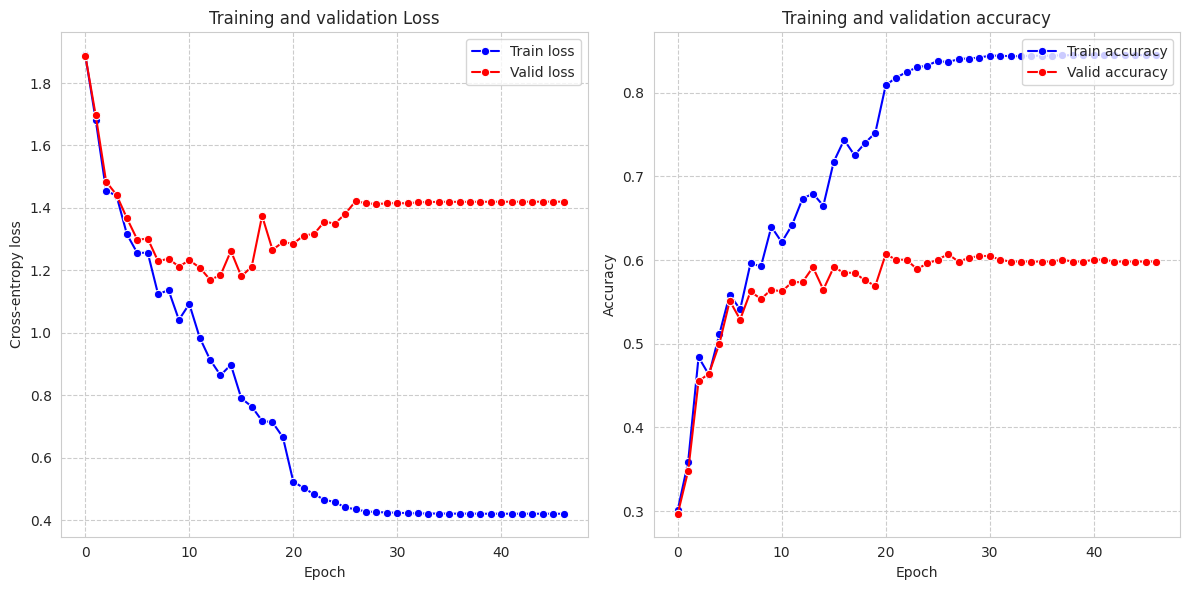

In [8]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [16, 32, 64, 128]
config.dropout_map = [0, 0, 0.1, 0.2]
config.dropout_fc = [0.1, 0.2]

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation:**
- With introducing additional convolution layer and increasing units, the validation accuracy increased from 0.585 to 0.607. This is the best model setup among the trials.

### Checklist
**Class distribution**: Examine the current class distribution in the training dataset
- Which class has the least number of samples?
  - seborrheic keratosis
- Which classes dominate the data in terms of the proportionate number of samples?
  - pigmented benign keratosis

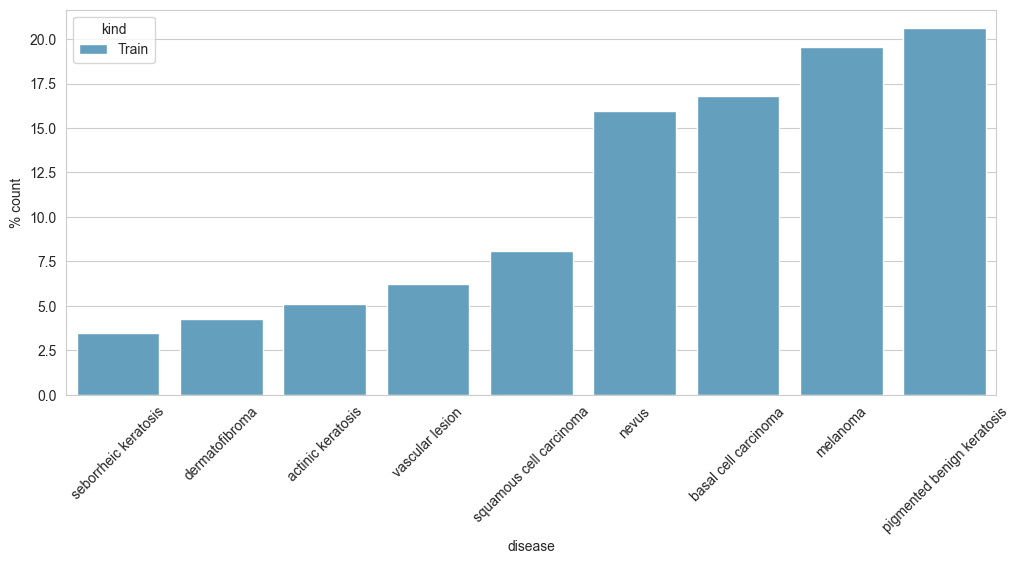

## Training with weighted cross entropy loss
- Introduced class weights of all the 9 labels in cross entropy loss as a part of resolving class imbalance problem.
- Use the same model setup as baseline #5

set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 13975.27it/s]


Samples in train dataset: 1791
Samples in test dataset: 448
Class weights: [0.9448451421298261, 0.8336868901145524, 0.9529062367416207, 0.8073822655918541, 0.841747984726347, 0.797199830292745, 0.9660585490029698, 0.9164191769198133, 0.9397539244802715]
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.1, inplace=False)
    (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kern

Epoch 1/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.31it/s, batch_loss=1.895998, epoch_loss=2.040268, learning_rate=0.001]



>>> [2024-01-17 22:46:43.871767 | 1/200 | Early stopping counter 0] 
    loss          - train: 1.896158      valid: 1.870847 
    accuracy      - train: 0.301508      valid: 0.299107 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.52it/s, batch_loss=1.671823, epoch_loss=1.807864, learning_rate=0.001]



>>> [2024-01-17 22:46:49.691030 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.612022      valid: 1.613200 
    accuracy      - train: 0.445003      valid: 0.433036 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.67it/s, batch_loss=1.386011, epoch_loss=1.650691, learning_rate=0.001]



>>> [2024-01-17 22:46:54.903883 | 3/200 | Early stopping counter 0] 
    loss          - train: 1.515934      valid: 1.491230 
    accuracy      - train: 0.475154      valid: 0.495536 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.78it/s, batch_loss=1.801249, epoch_loss=1.517034, learning_rate=0.001]



>>> [2024-01-17 22:46:59.945959 | 4/200 | Early stopping counter 0] 
    loss          - train: 1.356873      valid: 1.368505 
    accuracy      - train: 0.530988      valid: 0.533482 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.37it/s, batch_loss=1.479830, epoch_loss=1.411377, learning_rate=0.001]



>>> [2024-01-17 22:47:05.904724 | 5/200 | Early stopping counter 1] 
    loss          - train: 1.384028      valid: 1.429108 
    accuracy      - train: 0.497487      valid: 0.491071 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.69it/s, batch_loss=1.782607, epoch_loss=1.419533, learning_rate=0.001]



>>> [2024-01-17 22:47:10.943386 | 6/200 | Early stopping counter 2] 
    loss          - train: 1.367248      valid: 1.397986 
    accuracy      - train: 0.509213      valid: 0.495536 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.60it/s, batch_loss=1.440273, epoch_loss=1.340430, learning_rate=0.001]



>>> [2024-01-17 22:47:16.235344 | 7/200 | Early stopping counter 0] 
    loss          - train: 1.284019      valid: 1.312254 
    accuracy      - train: 0.553322      valid: 0.537946 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.20it/s, batch_loss=1.473479, epoch_loss=1.285194, learning_rate=0.001]



>>> [2024-01-17 22:47:21.886465 | 8/200 | Early stopping counter 0] 
    loss          - train: 1.161389      valid: 1.276683 
    accuracy      - train: 0.585706      valid: 0.551339 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.46it/s, batch_loss=1.259113, epoch_loss=1.253087, learning_rate=0.001]



>>> [2024-01-17 22:47:26.971316 | 9/200 | Early stopping counter 0] 
    loss          - train: 1.159636      valid: 1.252763 
    accuracy      - train: 0.591290      valid: 0.558036 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.37it/s, batch_loss=1.124313, epoch_loss=1.225477, learning_rate=0.001]



>>> [2024-01-17 22:47:32.679613 | 10/200 | Early stopping counter 1] 
    loss          - train: 1.114902      valid: 1.248302 
    accuracy      - train: 0.618649      valid: 0.551339 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 18.42it/s, batch_loss=1.186711, epoch_loss=1.160827, learning_rate=0.001]



>>> [2024-01-17 22:47:38.087348 | 11/200 | Early stopping counter 0] 
    loss          - train: 1.097663      valid: 1.250459 
    accuracy      - train: 0.624232      valid: 0.558036 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.69it/s, batch_loss=1.135838, epoch_loss=1.168746, learning_rate=0.001]



>>> [2024-01-17 22:47:43.164846 | 12/200 | Early stopping counter 1] 
    loss          - train: 1.111813      valid: 1.326804 
    accuracy      - train: 0.597432      valid: 0.529018 
    learning rate        : 1.00000e-03



Epoch 13/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 16.98it/s, batch_loss=1.276172, epoch_loss=1.129331, learning_rate=0.001]



>>> [2024-01-17 22:47:49.668926 | 13/200 | Early stopping counter 0] 
    loss          - train: 0.975546      valid: 1.197483 
    accuracy      - train: 0.658850      valid: 0.580357 
    learning rate        : 1.00000e-03



Epoch 14/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 16.01it/s, batch_loss=0.993974, epoch_loss=1.095126, learning_rate=0.001]



>>> [2024-01-17 22:47:55.482493 | 14/200 | Early stopping counter 1] 
    loss          - train: 0.965426      valid: 1.236729 
    accuracy      - train: 0.651591      valid: 0.573661 
    learning rate        : 1.00000e-03



Epoch 15/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.37it/s, batch_loss=0.978833, epoch_loss=1.073768, learning_rate=0.001]



>>> [2024-01-17 22:48:00.587847 | 15/200 | Early stopping counter 2] 
    loss          - train: 0.977064      valid: 1.332678 
    accuracy      - train: 0.653266      valid: 0.544643 
    learning rate        : 1.00000e-03



Epoch 16/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 18.88it/s, batch_loss=1.398388, epoch_loss=1.033955, learning_rate=0.001]



>>> [2024-01-17 22:48:06.451967 | 16/200 | Early stopping counter 3] 
    loss          - train: 0.984829      valid: 1.249944 
    accuracy      - train: 0.666108      valid: 0.551339 
    learning rate        : 1.00000e-03



Epoch 17/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 19.69it/s, batch_loss=0.881922, epoch_loss=1.016236, learning_rate=0.001]



>>> [2024-01-17 22:48:11.666211 | 17/200 | Early stopping counter 4] 
    loss          - train: 0.860377      valid: 1.241947 
    accuracy      - train: 0.707426      valid: 0.575893 
    learning rate        : 1.00000e-03



Epoch 18/200: 100%|██████████████████████████████████████████████| 56/56 [00:02<00:00, 20.94it/s, batch_loss=0.636671, epoch_loss=0.947521, learning_rate=0.001]



>>> [2024-01-17 22:48:16.667790 | 18/200 | Early stopping counter 5] 
    loss          - train: 0.797895      valid: 1.341195 
    accuracy      - train: 0.712451      valid: 0.573661 
    learning rate        : 1.00000e-03



Epoch 19/200: 100%|██████████████████████████████████████████████| 56/56 [00:03<00:00, 17.84it/s, batch_loss=1.264972, epoch_loss=0.928275, learning_rate=0.001]



>>> [2024-01-17 22:48:22.600583 | 19/200 | Early stopping counter 6] 
    loss          - train: 0.864783      valid: 1.435517 
    accuracy      - train: 0.683975      valid: 0.537946 
    learning rate        : 1.00000e-04



Epoch 20/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.71it/s, batch_loss=0.959008, epoch_loss=0.785949, learning_rate=0.0001]



>>> [2024-01-17 22:48:27.647790 | 20/200 | Early stopping counter 0] 
    loss          - train: 0.684402      valid: 1.238312 
    accuracy      - train: 0.764377      valid: 0.582589 
    learning rate        : 1.00000e-04



Epoch 21/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.45it/s, batch_loss=0.642608, epoch_loss=0.734718, learning_rate=0.0001]



>>> [2024-01-17 22:48:33.001702 | 21/200 | Early stopping counter 1] 
    loss          - train: 0.654695      valid: 1.287155 
    accuracy      - train: 0.774986      valid: 0.573661 
    learning rate        : 1.00000e-04



Epoch 22/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 16.93it/s, batch_loss=0.867974, epoch_loss=0.732402, learning_rate=0.0001]



>>> [2024-01-17 22:48:38.732206 | 22/200 | Early stopping counter 2] 
    loss          - train: 0.640001      valid: 1.299542 
    accuracy      - train: 0.776103      valid: 0.573661 
    learning rate        : 1.00000e-04



Epoch 23/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.02it/s, batch_loss=0.917001, epoch_loss=0.723815, learning_rate=0.0001]



>>> [2024-01-17 22:48:43.907730 | 23/200 | Early stopping counter 3] 
    loss          - train: 0.626364      valid: 1.311943 
    accuracy      - train: 0.781128      valid: 0.566964 
    learning rate        : 1.00000e-04



Epoch 24/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 19.94it/s, batch_loss=0.922284, epoch_loss=0.713360, learning_rate=0.0001]



>>> [2024-01-17 22:48:49.606151 | 24/200 | Early stopping counter 4] 
    loss          - train: 0.606330      valid: 1.320694 
    accuracy      - train: 0.785036      valid: 0.571429 
    learning rate        : 1.00000e-04



Epoch 25/200: 100%|█████████████████████████████████████████████| 56/56 [00:03<00:00, 18.53it/s, batch_loss=0.781321, epoch_loss=0.687918, learning_rate=0.0001]



>>> [2024-01-17 22:48:55.003401 | 25/200 | Early stopping counter 5] 
    loss          - train: 0.599705      valid: 1.334305 
    accuracy      - train: 0.792853      valid: 0.571429 
    learning rate        : 1.00000e-04



Epoch 26/200: 100%|█████████████████████████████████████████████| 56/56 [00:02<00:00, 20.64it/s, batch_loss=0.523113, epoch_loss=0.682244, learning_rate=0.0001]



>>> [2024-01-17 22:49:00.070110 | 26/200 | Early stopping counter 6] 
    loss          - train: 0.584811      valid: 1.329190 
    accuracy      - train: 0.792853      valid: 0.580357 
    learning rate        : 1.00000e-05



Epoch 27/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.34it/s, batch_loss=0.656015, epoch_loss=0.661349, learning_rate=1e-5]



>>> [2024-01-17 22:49:06.062042 | 27/200 | Early stopping counter 0] 
    loss          - train: 0.579974      valid: 1.333265 
    accuracy      - train: 0.793970      valid: 0.584821 
    learning rate        : 1.00000e-05



Epoch 28/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.78it/s, batch_loss=0.755982, epoch_loss=0.649196, learning_rate=1e-5]



>>> [2024-01-17 22:49:11.108469 | 28/200 | Early stopping counter 1] 
    loss          - train: 0.577959      valid: 1.333962 
    accuracy      - train: 0.799553      valid: 0.580357 
    learning rate        : 1.00000e-05



Epoch 29/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.53it/s, batch_loss=0.654925, epoch_loss=0.646163, learning_rate=1e-5]



>>> [2024-01-17 22:49:16.248525 | 29/200 | Early stopping counter 2] 
    loss          - train: 0.576450      valid: 1.333854 
    accuracy      - train: 0.798995      valid: 0.580357 
    learning rate        : 1.00000e-05



Epoch 30/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.22it/s, batch_loss=0.823455, epoch_loss=0.663176, learning_rate=1e-5]



>>> [2024-01-17 22:49:22.104711 | 30/200 | Early stopping counter 0] 
    loss          - train: 0.575154      valid: 1.330199 
    accuracy      - train: 0.797320      valid: 0.587054 
    learning rate        : 1.00000e-05



Epoch 31/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.53it/s, batch_loss=0.915598, epoch_loss=0.652548, learning_rate=1e-5]



>>> [2024-01-17 22:49:27.179501 | 31/200 | Early stopping counter 1] 
    loss          - train: 0.574337      valid: 1.330554 
    accuracy      - train: 0.800112      valid: 0.582589 
    learning rate        : 1.00000e-05



Epoch 32/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.59it/s, batch_loss=0.835860, epoch_loss=0.653445, learning_rate=1e-5]



>>> [2024-01-17 22:49:32.640206 | 32/200 | Early stopping counter 0] 
    loss          - train: 0.573116      valid: 1.326946 
    accuracy      - train: 0.798437      valid: 0.587054 
    learning rate        : 1.00000e-05



Epoch 33/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.48it/s, batch_loss=0.857423, epoch_loss=0.658172, learning_rate=1e-5]



>>> [2024-01-17 22:49:38.237637 | 33/200 | Early stopping counter 1] 
    loss          - train: 0.572846      valid: 1.333038 
    accuracy      - train: 0.799553      valid: 0.584821 
    learning rate        : 1.00000e-05



Epoch 34/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.21it/s, batch_loss=0.748791, epoch_loss=0.653490, learning_rate=1e-5]



>>> [2024-01-17 22:49:43.372670 | 34/200 | Early stopping counter 2] 
    loss          - train: 0.570924      valid: 1.332174 
    accuracy      - train: 0.800112      valid: 0.580357 
    learning rate        : 1.00000e-05



Epoch 35/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.48it/s, batch_loss=0.561314, epoch_loss=0.649376, learning_rate=1e-5]



>>> [2024-01-17 22:49:49.156286 | 35/200 | Early stopping counter 3] 
    loss          - train: 0.569523      valid: 1.332591 
    accuracy      - train: 0.800112      valid: 0.582589 
    learning rate        : 1.00000e-05



Epoch 36/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.20it/s, batch_loss=0.550941, epoch_loss=0.649670, learning_rate=1e-5]



>>> [2024-01-17 22:49:54.452702 | 36/200 | Early stopping counter 4] 
    loss          - train: 0.568612      valid: 1.333204 
    accuracy      - train: 0.798437      valid: 0.575893 
    learning rate        : 1.00000e-06



Epoch 37/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.33it/s, batch_loss=0.438484, epoch_loss=0.642205, learning_rate=1e-6]



>>> [2024-01-17 22:49:59.558175 | 37/200 | Early stopping counter 5] 
    loss          - train: 0.568214      valid: 1.333383 
    accuracy      - train: 0.798995      valid: 0.578125 
    learning rate        : 1.00000e-06



Epoch 38/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.84it/s, batch_loss=0.411374, epoch_loss=0.650062, learning_rate=1e-6]



>>> [2024-01-17 22:50:05.509935 | 38/200 | Early stopping counter 6] 
    loss          - train: 0.568325      valid: 1.334040 
    accuracy      - train: 0.799553      valid: 0.578125 
    learning rate        : 1.00000e-06



Epoch 39/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.20it/s, batch_loss=0.857273, epoch_loss=0.639402, learning_rate=1e-6]



>>> [2024-01-17 22:50:10.626354 | 39/200 | Early stopping counter 7] 
    loss          - train: 0.567835      valid: 1.334327 
    accuracy      - train: 0.799553      valid: 0.580357 
    learning rate        : 1.00000e-06



Epoch 40/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.73it/s, batch_loss=0.578039, epoch_loss=0.630735, learning_rate=1e-6]



>>> [2024-01-17 22:50:16.788691 | 40/200 | Early stopping counter 8] 
    loss          - train: 0.567746      valid: 1.334211 
    accuracy      - train: 0.800112      valid: 0.580357 
    learning rate        : 1.00000e-06



Epoch 41/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 15.19it/s, batch_loss=0.655519, epoch_loss=0.636888, learning_rate=1e-6]



>>> [2024-01-17 22:50:23.593820 | 41/200 | Early stopping counter 9] 
    loss          - train: 0.567534      valid: 1.333910 
    accuracy      - train: 0.800112      valid: 0.582589 
    learning rate        : 1.00000e-06



Epoch 42/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 18.33it/s, batch_loss=0.700914, epoch_loss=0.653855, learning_rate=1e-6]



>>> [2024-01-17 22:50:29.022052 | 42/200 | Early stopping counter 10] 
    loss          - train: 0.567741      valid: 1.333638 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-07



Epoch 43/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.03it/s, batch_loss=0.499523, epoch_loss=0.655952, learning_rate=1e-7]



>>> [2024-01-17 22:50:34.596930 | 43/200 | Early stopping counter 11] 
    loss          - train: 0.567283      valid: 1.333667 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-07



Epoch 44/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.53it/s, batch_loss=0.507760, epoch_loss=0.640092, learning_rate=1e-7]



>>> [2024-01-17 22:50:40.172956 | 44/200 | Early stopping counter 12] 
    loss          - train: 0.567447      valid: 1.333671 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-07



Epoch 45/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.16it/s, batch_loss=0.641278, epoch_loss=0.638234, learning_rate=1e-7]



>>> [2024-01-17 22:50:45.308614 | 45/200 | Early stopping counter 13] 
    loss          - train: 0.567266      valid: 1.333704 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-07



Epoch 46/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 19.46it/s, batch_loss=0.357037, epoch_loss=0.644776, learning_rate=1e-7]



>>> [2024-01-17 22:50:51.103449 | 46/200 | Early stopping counter 14] 
    loss          - train: 0.567549      valid: 1.333721 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-07



Epoch 47/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.68it/s, batch_loss=0.605085, epoch_loss=0.641935, learning_rate=1e-7]



>>> [2024-01-17 22:50:56.619419 | 47/200 | Early stopping counter 15] 
    loss          - train: 0.567653      valid: 1.333728 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-07



Epoch 48/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.47it/s, batch_loss=0.830979, epoch_loss=0.639087, learning_rate=1e-7]



>>> [2024-01-17 22:51:01.698231 | 48/200 | Early stopping counter 16] 
    loss          - train: 0.567085      valid: 1.333819 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-08



Epoch 49/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.40it/s, batch_loss=0.761707, epoch_loss=0.633022, learning_rate=1e-8]



>>> [2024-01-17 22:51:07.746015 | 49/200 | Early stopping counter 17] 
    loss          - train: 0.567609      valid: 1.333825 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-08



Epoch 50/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.64it/s, batch_loss=0.496402, epoch_loss=0.642206, learning_rate=1e-8]



>>> [2024-01-17 22:51:12.797903 | 50/200 | Early stopping counter 18] 
    loss          - train: 0.567241      valid: 1.333828 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-08



Epoch 51/200: 100%|███████████████████████████████████████████████| 56/56 [00:02<00:00, 20.60it/s, batch_loss=0.385901, epoch_loss=0.640862, learning_rate=1e-8]



>>> [2024-01-17 22:51:18.826995 | 51/200 | Early stopping counter 19] 
    loss          - train: 0.567242      valid: 1.333829 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-08



Epoch 52/200: 100%|███████████████████████████████████████████████| 56/56 [00:03<00:00, 17.08it/s, batch_loss=0.661074, epoch_loss=0.655868, learning_rate=1e-8]



>>> [2024-01-17 22:51:24.862839 | 52/200 | Early stopping counter 20] 
    loss          - train: 0.567602      valid: 1.333827 
    accuracy      - train: 0.800670      valid: 0.582589 
    learning rate        : 1.00000e-08



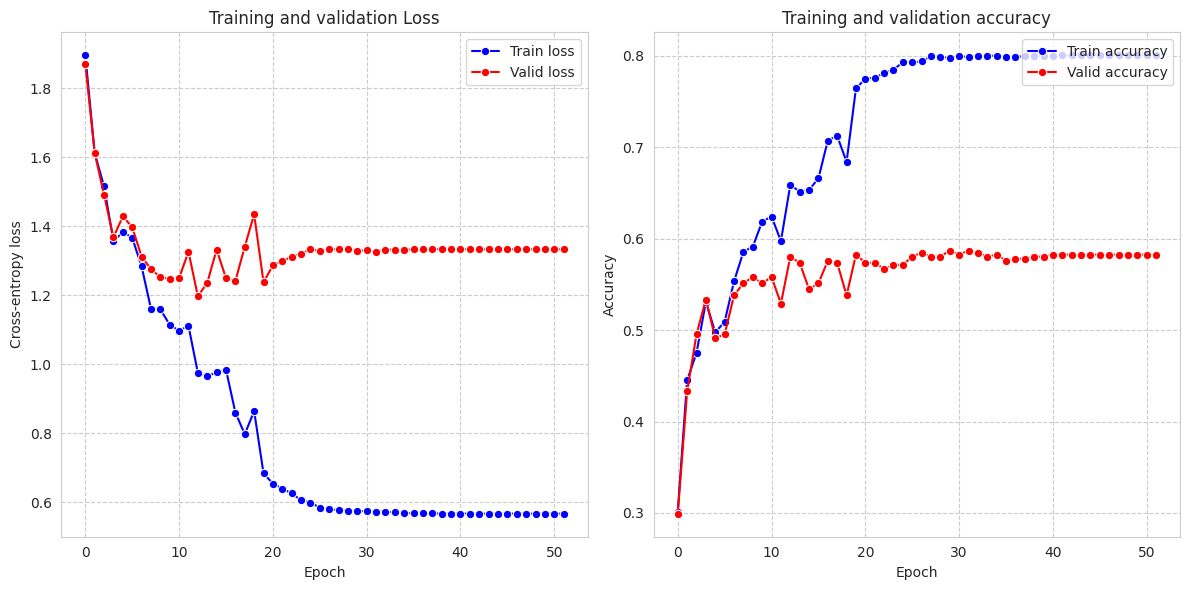

In [11]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [16, 32, 64, 128]
config.dropout_map = [0, 0, 0.1, 0.2]
config.dropout_fc = [0.1, 0.2]
config.use_class_weights = True

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation**:
- Training the model with weighted cross-entropy loss dropped the validation accuracy slightly to 0.587.

## Model with data augmentation

Augmented samples are saved locally to avoid creating them again
```
# Code used for augmenting train images
p = Augmentor.Pipeline(datapath, output_directory = output_dir)
p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.25)
p.sample(config.aug_size)
p.process()
```



**Augmented 1:**
- Use the same model setup as baseline #5
- For each label, created 500 augmented images. Still the label are imbalanced, but unlike before, the model have more sample to train then it might affect the performance much.

Current vram: cuda
set seed to 42
loading images from resized folder


Organizing images for fold 4: 100%|██████████| 2239/2239 [00:00<00:00, 8360.96it/s]


Images after augmentation:
actinic keratosis                        : 591
basal cell carcinoma                     : 801
dermatofibroma                           : 576
melanoma                                 : 851
nevus                                    : 786
pigmented benign keratosis               : 869
seborrheic keratosis                     : 561
squamous cell carcinoma                  : 645
vascular lesion                          : 611
Samples in train dataset: 6291
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

Epoch 1/200: 100%|█████████████████████████████████████████████| 197/197 [00:12<00:00, 16.20it/s, batch_loss=1.892784, epoch_loss=1.982701, learning_rate=0.001]



>>> [2024-01-17 22:56:00.915527 | 1/200 | Early stopping counter 0] 
    loss          - train: 1.722978      valid: 1.721893 
    accuracy      - train: 0.359402      valid: 0.350446 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|█████████████████████████████████████████████| 197/197 [00:10<00:00, 19.48it/s, batch_loss=1.648386, epoch_loss=1.611129, learning_rate=0.001]



>>> [2024-01-17 22:56:18.335498 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.445088      valid: 1.387361 
    accuracy      - train: 0.443650      valid: 0.537946 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|█████████████████████████████████████████████| 197/197 [00:10<00:00, 18.83it/s, batch_loss=1.645623, epoch_loss=1.519384, learning_rate=0.001]



>>> [2024-01-17 22:56:35.986716 | 3/200 | Early stopping counter 1] 
    loss          - train: 1.387940      valid: 1.415077 
    accuracy      - train: 0.484820      valid: 0.520089 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|█████████████████████████████████████████████| 197/197 [00:10<00:00, 18.91it/s, batch_loss=1.375617, epoch_loss=1.430671, learning_rate=0.001]



>>> [2024-01-17 22:56:54.604446 | 4/200 | Early stopping counter 2] 
    loss          - train: 1.293316      valid: 1.350855 
    accuracy      - train: 0.508822      valid: 0.515625 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|█████████████████████████████████████████████| 197/197 [00:09<00:00, 20.26it/s, batch_loss=1.626606, epoch_loss=1.377810, learning_rate=0.001]



>>> [2024-01-17 22:57:12.457030 | 5/200 | Early stopping counter 3] 
    loss          - train: 1.231855      valid: 1.348472 
    accuracy      - train: 0.523287      valid: 0.495536 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|█████████████████████████████████████████████| 197/197 [00:10<00:00, 19.44it/s, batch_loss=1.316663, epoch_loss=1.319081, learning_rate=0.001]



>>> [2024-01-17 22:57:30.146382 | 6/200 | Early stopping counter 4] 
    loss          - train: 1.159963      valid: 1.291831 
    accuracy      - train: 0.567318      valid: 0.515625 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|█████████████████████████████████████████████| 197/197 [00:10<00:00, 18.97it/s, batch_loss=1.016280, epoch_loss=1.273634, learning_rate=0.001]



>>> [2024-01-17 22:57:47.749514 | 7/200 | Early stopping counter 5] 
    loss          - train: 1.130594      valid: 1.301635 
    accuracy      - train: 0.567636      valid: 0.475446 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|█████████████████████████████████████████████| 197/197 [00:11<00:00, 17.45it/s, batch_loss=1.568444, epoch_loss=1.239419, learning_rate=0.001]



>>> [2024-01-17 22:58:06.948543 | 8/200 | Early stopping counter 6] 
    loss          - train: 1.107383      valid: 1.264458 
    accuracy      - train: 0.591321      valid: 0.522321 
    learning rate        : 1.00000e-04



Epoch 9/200: 100%|████████████████████████████████████████████| 197/197 [00:09<00:00, 20.36it/s, batch_loss=0.916079, epoch_loss=1.106021, learning_rate=0.0001]



>>> [2024-01-17 22:58:24.620755 | 9/200 | Early stopping counter 7] 
    loss          - train: 0.957086      valid: 1.210590 
    accuracy      - train: 0.635988      valid: 0.524554 
    learning rate        : 1.00000e-04



Epoch 10/200: 100%|███████████████████████████████████████████| 197/197 [00:09<00:00, 20.44it/s, batch_loss=1.071789, epoch_loss=1.058715, learning_rate=0.0001]



>>> [2024-01-17 22:58:42.042126 | 10/200 | Early stopping counter 8] 
    loss          - train: 0.923006      valid: 1.201505 
    accuracy      - train: 0.653155      valid: 0.533482 
    learning rate        : 1.00000e-04



Epoch 11/200: 100%|███████████████████████████████████████████| 197/197 [00:10<00:00, 19.06it/s, batch_loss=1.014553, epoch_loss=1.053550, learning_rate=0.0001]



>>> [2024-01-17 22:58:59.737781 | 11/200 | Early stopping counter 9] 
    loss          - train: 0.914611      valid: 1.200371 
    accuracy      - train: 0.653155      valid: 0.531250 
    learning rate        : 1.00000e-04



Epoch 12/200: 100%|███████████████████████████████████████████| 197/197 [00:10<00:00, 18.92it/s, batch_loss=0.795160, epoch_loss=1.035302, learning_rate=0.0001]



>>> [2024-01-17 22:59:17.531862 | 12/200 | Early stopping counter 10] 
    loss          - train: 0.887210      valid: 1.198531 
    accuracy      - train: 0.673820      valid: 0.529018 
    learning rate        : 1.00000e-04



Epoch 13/200: 100%|███████████████████████████████████████████| 197/197 [00:10<00:00, 19.48it/s, batch_loss=0.965832, epoch_loss=1.028542, learning_rate=0.0001]



>>> [2024-01-17 22:59:35.687432 | 13/200 | Early stopping counter 11] 
    loss          - train: 0.874327      valid: 1.202712 
    accuracy      - train: 0.673343      valid: 0.526786 
    learning rate        : 1.00000e-04



Epoch 14/200: 100%|███████████████████████████████████████████| 197/197 [00:09<00:00, 20.59it/s, batch_loss=0.729704, epoch_loss=1.020801, learning_rate=0.0001]



>>> [2024-01-17 22:59:53.347302 | 14/200 | Early stopping counter 12] 
    loss          - train: 0.873550      valid: 1.204683 
    accuracy      - train: 0.678906      valid: 0.513393 
    learning rate        : 1.00000e-05



Epoch 15/200: 100%|█████████████████████████████████████████████| 197/197 [00:10<00:00, 19.31it/s, batch_loss=1.298560, epoch_loss=1.000467, learning_rate=1e-5]



>>> [2024-01-17 23:00:11.109860 | 15/200 | Early stopping counter 13] 
    loss          - train: 0.864368      valid: 1.197338 
    accuracy      - train: 0.682880      valid: 0.517857 
    learning rate        : 1.00000e-05



Epoch 16/200: 100%|█████████████████████████████████████████████| 197/197 [00:10<00:00, 18.93it/s, batch_loss=1.127797, epoch_loss=0.995100, learning_rate=1e-5]



>>> [2024-01-17 23:00:29.517761 | 16/200 | Early stopping counter 14] 
    loss          - train: 0.859747      valid: 1.195880 
    accuracy      - train: 0.686695      valid: 0.522321 
    learning rate        : 1.00000e-05



Epoch 17/200: 100%|█████████████████████████████████████████████| 197/197 [00:10<00:00, 19.07it/s, batch_loss=1.109323, epoch_loss=0.995237, learning_rate=1e-5]



>>> [2024-01-17 23:00:47.688358 | 17/200 | Early stopping counter 15] 
    loss          - train: 0.858745      valid: 1.198409 
    accuracy      - train: 0.684788      valid: 0.522321 
    learning rate        : 1.00000e-05



Epoch 18/200: 100%|█████████████████████████████████████████████| 197/197 [00:09<00:00, 20.04it/s, batch_loss=0.844163, epoch_loss=1.004921, learning_rate=1e-5]



>>> [2024-01-17 23:01:05.587777 | 18/200 | Early stopping counter 16] 
    loss          - train: 0.859979      valid: 1.200505 
    accuracy      - train: 0.686695      valid: 0.520089 
    learning rate        : 1.00000e-05



Epoch 19/200: 100%|█████████████████████████████████████████████| 197/197 [00:09<00:00, 19.72it/s, batch_loss=1.224355, epoch_loss=1.005731, learning_rate=1e-5]



>>> [2024-01-17 23:01:23.135432 | 19/200 | Early stopping counter 17] 
    loss          - train: 0.856967      valid: 1.195494 
    accuracy      - train: 0.688444      valid: 0.515625 
    learning rate        : 1.00000e-05



Epoch 20/200: 100%|█████████████████████████████████████████████| 197/197 [00:10<00:00, 19.04it/s, batch_loss=0.943977, epoch_loss=0.997987, learning_rate=1e-5]



>>> [2024-01-17 23:01:42.060024 | 20/200 | Early stopping counter 18] 
    loss          - train: 0.852668      valid: 1.197081 
    accuracy      - train: 0.688285      valid: 0.520089 
    learning rate        : 1.00000e-06



Epoch 21/200: 100%|█████████████████████████████████████████████| 197/197 [00:13<00:00, 14.54it/s, batch_loss=0.888730, epoch_loss=0.988719, learning_rate=1e-6]



>>> [2024-01-17 23:02:05.137048 | 21/200 | Early stopping counter 19] 
    loss          - train: 0.852934      valid: 1.197543 
    accuracy      - train: 0.687967      valid: 0.515625 
    learning rate        : 1.00000e-06



Epoch 22/200: 100%|█████████████████████████████████████████████| 197/197 [00:09<00:00, 19.90it/s, batch_loss=0.818981, epoch_loss=0.986614, learning_rate=1e-6]



>>> [2024-01-17 23:02:23.830960 | 22/200 | Early stopping counter 20] 
    loss          - train: 0.853162      valid: 1.197991 
    accuracy      - train: 0.687649      valid: 0.520089 
    learning rate        : 1.00000e-06



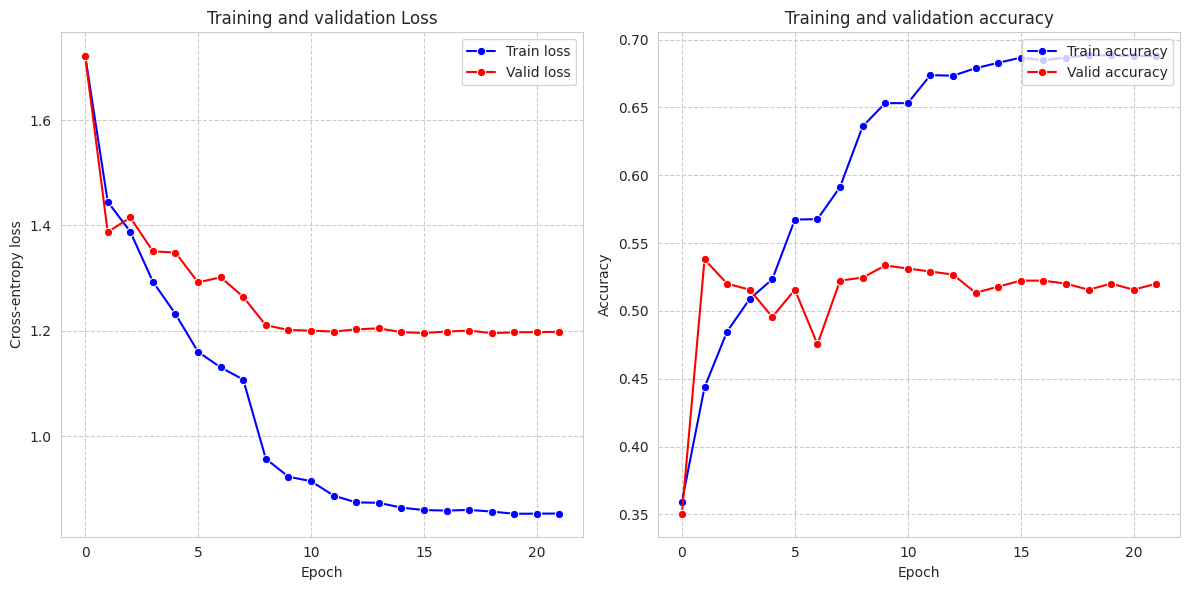

In [4]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'augmentxconvnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [16, 32, 64, 128]
config.dropout_map = [0, 0, 0.4, 0.4]
config.dropout_fc = [0.25, 0.5]
config.use_class_weights = False

# Data augmentation
config.aug_dir = '/content/aug_data'
config.aug_size = 500       # additional samples = aug_size - original_size

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation**:
- Training the model with additional 500 augmented images for each label performed poorly with only 0.566 validation accuracy.
- Model overfitted too early in the train. It is better to reduce complexity of the model arch.

**Augmented 2:**
- Use the same model setup as baseline #5
- Reduced augmented images for each label to 100.

Images after augmentation:
actinic keratosis                        : 191
basal cell carcinoma                     : 401
dermatofibroma                           : 176
melanoma                                 : 451
nevus                                    : 386
pigmented benign keratosis               : 469
seborrheic keratosis                     : 161
squamous cell carcinoma                  : 245
vascular lesion                          : 211
Samples in train dataset: 2691
Samples in test dataset: 448
>>> MODEL ARCHITECTURE
BaselineConvNet(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

Epoch 1/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 17.45it/s, batch_loss=2.173503, epoch_loss=2.065221, learning_rate=0.001]



>>> [2024-01-17 23:23:00.737747 | 1/200 | Early stopping counter 0] 
    loss          - train: 1.892169      valid: 1.861558 
    accuracy      - train: 0.294314      valid: 0.354911 
    learning rate        : 1.00000e-03



Epoch 2/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 20.32it/s, batch_loss=1.456217, epoch_loss=1.741963, learning_rate=0.001]



>>> [2024-01-17 23:23:08.924825 | 2/200 | Early stopping counter 0] 
    loss          - train: 1.575374      valid: 1.502365 
    accuracy      - train: 0.428465      valid: 0.455357 
    learning rate        : 1.00000e-03



Epoch 3/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 19.04it/s, batch_loss=1.541667, epoch_loss=1.533601, learning_rate=0.001]



>>> [2024-01-17 23:23:16.784312 | 3/200 | Early stopping counter 0] 
    loss          - train: 1.524326      valid: 1.494708 
    accuracy      - train: 0.405797      valid: 0.466518 
    learning rate        : 1.00000e-03



Epoch 4/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 19.97it/s, batch_loss=0.413656, epoch_loss=1.427524, learning_rate=0.001]



>>> [2024-01-17 23:23:25.253143 | 4/200 | Early stopping counter 0] 
    loss          - train: 1.308124      valid: 1.307150 
    accuracy      - train: 0.502415      valid: 0.517857 
    learning rate        : 1.00000e-03



Epoch 5/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 19.98it/s, batch_loss=1.409994, epoch_loss=1.374682, learning_rate=0.001]



>>> [2024-01-17 23:23:32.946176 | 5/200 | Early stopping counter 1] 
    loss          - train: 1.459750      valid: 1.464853 
    accuracy      - train: 0.454478      valid: 0.453125 
    learning rate        : 1.00000e-03



Epoch 6/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 18.48it/s, batch_loss=1.394694, epoch_loss=1.357055, learning_rate=0.001]



>>> [2024-01-17 23:23:41.316384 | 6/200 | Early stopping counter 0] 
    loss          - train: 1.225429      valid: 1.238942 
    accuracy      - train: 0.534374      valid: 0.551339 
    learning rate        : 1.00000e-03



Epoch 7/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 20.35it/s, batch_loss=1.413737, epoch_loss=1.287609, learning_rate=0.001]



>>> [2024-01-17 23:23:48.931360 | 7/200 | Early stopping counter 1] 
    loss          - train: 1.277519      valid: 1.373093 
    accuracy      - train: 0.497213      valid: 0.511161 
    learning rate        : 1.00000e-03



Epoch 8/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 17.43it/s, batch_loss=2.154297, epoch_loss=1.274487, learning_rate=0.001]



>>> [2024-01-17 23:23:57.515191 | 8/200 | Early stopping counter 2] 
    loss          - train: 1.253422      valid: 1.317223 
    accuracy      - train: 0.533259      valid: 0.493304 
    learning rate        : 1.00000e-03



Epoch 9/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 18.88it/s, batch_loss=0.956055, epoch_loss=1.216388, learning_rate=0.001]



>>> [2024-01-17 23:24:06.258015 | 9/200 | Early stopping counter 0] 
    loss          - train: 1.132718      valid: 1.209809 
    accuracy      - train: 0.574508      valid: 0.569196 
    learning rate        : 1.00000e-03



Epoch 10/200: 100%|██████████████████████████████████████████████| 85/85 [00:06<00:00, 13.81it/s, batch_loss=2.419108, epoch_loss=1.201945, learning_rate=0.001]



>>> [2024-01-17 23:24:16.312529 | 10/200 | Early stopping counter 1] 
    loss          - train: 1.260849      valid: 1.407622 
    accuracy      - train: 0.501301      valid: 0.497768 
    learning rate        : 1.00000e-03



Epoch 11/200: 100%|██████████████████████████████████████████████| 85/85 [00:04<00:00, 19.24it/s, batch_loss=1.215983, epoch_loss=1.133112, learning_rate=0.001]



>>> [2024-01-17 23:24:24.701837 | 11/200 | Early stopping counter 2] 
    loss          - train: 1.033974      valid: 1.234419 
    accuracy      - train: 0.599777      valid: 0.558036 
    learning rate        : 1.00000e-03



Epoch 12/200: 100%|██████████████████████████████████████████████| 85/85 [00:04<00:00, 20.49it/s, batch_loss=0.861328, epoch_loss=1.075771, learning_rate=0.001]



>>> [2024-01-17 23:24:32.292763 | 12/200 | Early stopping counter 3] 
    loss          - train: 1.181675      valid: 1.546657 
    accuracy      - train: 0.558157      valid: 0.482143 
    learning rate        : 1.00000e-03



Epoch 13/200: 100%|██████████████████████████████████████████████| 85/85 [00:04<00:00, 17.33it/s, batch_loss=0.417337, epoch_loss=1.021337, learning_rate=0.001]



>>> [2024-01-17 23:24:41.191396 | 13/200 | Early stopping counter 0] 
    loss          - train: 0.905851      valid: 1.259422 
    accuracy      - train: 0.652174      valid: 0.575893 
    learning rate        : 1.00000e-03



Epoch 14/200: 100%|██████████████████████████████████████████████| 85/85 [00:04<00:00, 20.30it/s, batch_loss=0.620117, epoch_loss=0.980904, learning_rate=0.001]



>>> [2024-01-17 23:24:48.805128 | 14/200 | Early stopping counter 1] 
    loss          - train: 0.938229      valid: 1.318430 
    accuracy      - train: 0.641769      valid: 0.515625 
    learning rate        : 1.00000e-03



Epoch 15/200: 100%|██████████████████████████████████████████████| 85/85 [00:06<00:00, 13.73it/s, batch_loss=1.227214, epoch_loss=0.966874, learning_rate=0.001]



>>> [2024-01-17 23:24:59.228803 | 15/200 | Early stopping counter 2] 
    loss          - train: 0.831881      valid: 1.406837 
    accuracy      - train: 0.688592      valid: 0.531250 
    learning rate        : 1.00000e-03



Epoch 16/200: 100%|██████████████████████████████████████████████| 85/85 [00:04<00:00, 20.42it/s, batch_loss=0.760335, epoch_loss=0.897556, learning_rate=0.001]



>>> [2024-01-17 23:25:07.201575 | 16/200 | Early stopping counter 3] 
    loss          - train: 0.782900      valid: 1.329576 
    accuracy      - train: 0.693794      valid: 0.560268 
    learning rate        : 1.00000e-03



Epoch 17/200: 100%|██████████████████████████████████████████████| 85/85 [00:04<00:00, 18.67it/s, batch_loss=0.978830, epoch_loss=0.980515, learning_rate=0.001]



>>> [2024-01-17 23:25:15.448939 | 17/200 | Early stopping counter 4] 
    loss          - train: 0.853240      valid: 1.637369 
    accuracy      - train: 0.675214      valid: 0.484375 
    learning rate        : 1.00000e-03



Epoch 18/200: 100%|██████████████████████████████████████████████| 85/85 [00:04<00:00, 20.22it/s, batch_loss=1.424805, epoch_loss=0.846146, learning_rate=0.001]



>>> [2024-01-17 23:25:23.846131 | 18/200 | Early stopping counter 0] 
    loss          - train: 0.668620      valid: 1.360133 
    accuracy      - train: 0.752880      valid: 0.575893 
    learning rate        : 1.00000e-03



Epoch 19/200: 100%|██████████████████████████████████████████████| 85/85 [00:04<00:00, 20.02it/s, batch_loss=0.764079, epoch_loss=0.802509, learning_rate=0.001]



>>> [2024-01-17 23:25:31.486489 | 19/200 | Early stopping counter 1] 
    loss          - train: 0.675804      valid: 1.364229 
    accuracy      - train: 0.751765      valid: 0.544643 
    learning rate        : 1.00000e-04



Epoch 20/200: 100%|█████████████████████████████████████████████| 85/85 [00:04<00:00, 18.74it/s, batch_loss=0.265774, epoch_loss=0.656266, learning_rate=0.0001]



>>> [2024-01-17 23:25:39.977605 | 20/200 | Early stopping counter 0] 
    loss          - train: 0.513876      valid: 1.378559 
    accuracy      - train: 0.810851      valid: 0.598214 
    learning rate        : 1.00000e-04



Epoch 21/200: 100%|█████████████████████████████████████████████| 85/85 [00:04<00:00, 19.81it/s, batch_loss=0.903280, epoch_loss=0.606787, learning_rate=0.0001]



>>> [2024-01-17 23:25:47.685943 | 21/200 | Early stopping counter 1] 
    loss          - train: 0.482941      valid: 1.401468 
    accuracy      - train: 0.818655      valid: 0.575893 
    learning rate        : 1.00000e-04



Epoch 22/200: 100%|█████████████████████████████████████████████| 85/85 [00:04<00:00, 17.51it/s, batch_loss=0.185059, epoch_loss=0.579765, learning_rate=0.0001]



>>> [2024-01-17 23:25:56.070366 | 22/200 | Early stopping counter 2] 
    loss          - train: 0.472285      valid: 1.430891 
    accuracy      - train: 0.829803      valid: 0.593750 
    learning rate        : 1.00000e-04



Epoch 23/200: 100%|█████████████████████████████████████████████| 85/85 [00:04<00:00, 20.48it/s, batch_loss=0.666951, epoch_loss=0.565202, learning_rate=0.0001]



>>> [2024-01-17 23:26:03.724486 | 23/200 | Early stopping counter 3] 
    loss          - train: 0.447866      valid: 1.444732 
    accuracy      - train: 0.838350      valid: 0.591518 
    learning rate        : 1.00000e-04



Epoch 24/200: 100%|█████████████████████████████████████████████| 85/85 [00:04<00:00, 17.44it/s, batch_loss=0.256438, epoch_loss=0.548251, learning_rate=0.0001]



>>> [2024-01-17 23:26:12.121380 | 24/200 | Early stopping counter 4] 
    loss          - train: 0.447647      valid: 1.420908 
    accuracy      - train: 0.839465      valid: 0.582589 
    learning rate        : 1.00000e-04



Epoch 25/200: 100%|█████████████████████████████████████████████| 85/85 [00:04<00:00, 20.34it/s, batch_loss=1.054036, epoch_loss=0.546372, learning_rate=0.0001]



>>> [2024-01-17 23:26:20.132584 | 25/200 | Early stopping counter 5] 
    loss          - train: 0.428232      valid: 1.477924 
    accuracy      - train: 0.840580      valid: 0.575893 
    learning rate        : 1.00000e-04



Epoch 26/200: 100%|█████████████████████████████████████████████| 85/85 [00:04<00:00, 18.50it/s, batch_loss=0.513489, epoch_loss=0.523873, learning_rate=0.0001]



>>> [2024-01-17 23:26:28.135735 | 26/200 | Early stopping counter 6] 
    loss          - train: 0.433380      valid: 1.508761 
    accuracy      - train: 0.846154      valid: 0.571429 
    learning rate        : 1.00000e-05



Epoch 27/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 20.31it/s, batch_loss=0.120509, epoch_loss=0.507400, learning_rate=1e-5]



>>> [2024-01-17 23:26:36.427090 | 27/200 | Early stopping counter 7] 
    loss          - train: 0.405485      valid: 1.509438 
    accuracy      - train: 0.849127      valid: 0.582589 
    learning rate        : 1.00000e-05



Epoch 28/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 19.62it/s, batch_loss=0.681315, epoch_loss=0.515992, learning_rate=1e-5]



>>> [2024-01-17 23:26:44.204461 | 28/200 | Early stopping counter 8] 
    loss          - train: 0.407278      valid: 1.511703 
    accuracy      - train: 0.848755      valid: 0.582589 
    learning rate        : 1.00000e-05



Epoch 29/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 19.08it/s, batch_loss=0.246419, epoch_loss=0.503317, learning_rate=1e-5]



>>> [2024-01-17 23:26:53.069447 | 29/200 | Early stopping counter 9] 
    loss          - train: 0.404796      valid: 1.512716 
    accuracy      - train: 0.850985      valid: 0.582589 
    learning rate        : 1.00000e-05



Epoch 30/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 20.18it/s, batch_loss=0.852692, epoch_loss=0.513162, learning_rate=1e-5]



>>> [2024-01-17 23:27:00.664088 | 30/200 | Early stopping counter 10] 
    loss          - train: 0.403666      valid: 1.518218 
    accuracy      - train: 0.850613      valid: 0.582589 
    learning rate        : 1.00000e-05



Epoch 31/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 17.84it/s, batch_loss=0.368774, epoch_loss=0.498233, learning_rate=1e-5]



>>> [2024-01-17 23:27:09.038997 | 31/200 | Early stopping counter 11] 
    loss          - train: 0.409163      valid: 1.523705 
    accuracy      - train: 0.851728      valid: 0.584821 
    learning rate        : 1.00000e-05



Epoch 32/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 20.11it/s, batch_loss=0.436127, epoch_loss=0.507793, learning_rate=1e-5]



>>> [2024-01-17 23:27:17.331839 | 32/200 | Early stopping counter 12] 
    loss          - train: 0.398626      valid: 1.523630 
    accuracy      - train: 0.850242      valid: 0.582589 
    learning rate        : 1.00000e-06



Epoch 33/200: 100%|███████████████████████████████████████████████| 85/85 [00:05<00:00, 16.38it/s, batch_loss=0.512207, epoch_loss=0.501377, learning_rate=1e-6]



>>> [2024-01-17 23:27:26.058836 | 33/200 | Early stopping counter 13] 
    loss          - train: 0.408223      valid: 1.522309 
    accuracy      - train: 0.850242      valid: 0.580357 
    learning rate        : 1.00000e-06



Epoch 34/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 20.26it/s, batch_loss=0.972819, epoch_loss=0.505715, learning_rate=1e-6]



>>> [2024-01-17 23:27:33.822595 | 34/200 | Early stopping counter 14] 
    loss          - train: 0.400906      valid: 1.521981 
    accuracy      - train: 0.850242      valid: 0.580357 
    learning rate        : 1.00000e-06



Epoch 35/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 17.60it/s, batch_loss=0.957937, epoch_loss=0.510583, learning_rate=1e-6]



>>> [2024-01-17 23:27:42.134738 | 35/200 | Early stopping counter 15] 
    loss          - train: 0.401642      valid: 1.520530 
    accuracy      - train: 0.851356      valid: 0.580357 
    learning rate        : 1.00000e-06



Epoch 36/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 20.22it/s, batch_loss=0.353496, epoch_loss=0.507002, learning_rate=1e-6]



>>> [2024-01-17 23:27:50.228679 | 36/200 | Early stopping counter 16] 
    loss          - train: 0.402682      valid: 1.520235 
    accuracy      - train: 0.851728      valid: 0.584821 
    learning rate        : 1.00000e-06



Epoch 37/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 18.78it/s, batch_loss=1.419734, epoch_loss=0.511918, learning_rate=1e-6]



>>> [2024-01-17 23:27:58.178753 | 37/200 | Early stopping counter 17] 
    loss          - train: 0.417305      valid: 1.520496 
    accuracy      - train: 0.851356      valid: 0.582589 
    learning rate        : 1.00000e-06



Epoch 38/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 20.05it/s, batch_loss=0.477165, epoch_loss=0.507517, learning_rate=1e-6]



>>> [2024-01-17 23:28:06.613602 | 38/200 | Early stopping counter 18] 
    loss          - train: 0.400504      valid: 1.519641 
    accuracy      - train: 0.852100      valid: 0.584821 
    learning rate        : 1.00000e-07



Epoch 39/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 19.86it/s, batch_loss=0.077321, epoch_loss=0.498683, learning_rate=1e-7]



>>> [2024-01-17 23:28:14.302161 | 39/200 | Early stopping counter 19] 
    loss          - train: 0.398782      valid: 1.519604 
    accuracy      - train: 0.852100      valid: 0.584821 
    learning rate        : 1.00000e-07



Epoch 40/200: 100%|███████████████████████████████████████████████| 85/85 [00:04<00:00, 18.78it/s, batch_loss=0.596659, epoch_loss=0.502697, learning_rate=1e-7]



>>> [2024-01-17 23:28:22.712309 | 40/200 | Early stopping counter 20] 
    loss          - train: 0.404584      valid: 1.519590 
    accuracy      - train: 0.852100      valid: 0.584821 
    learning rate        : 1.00000e-07



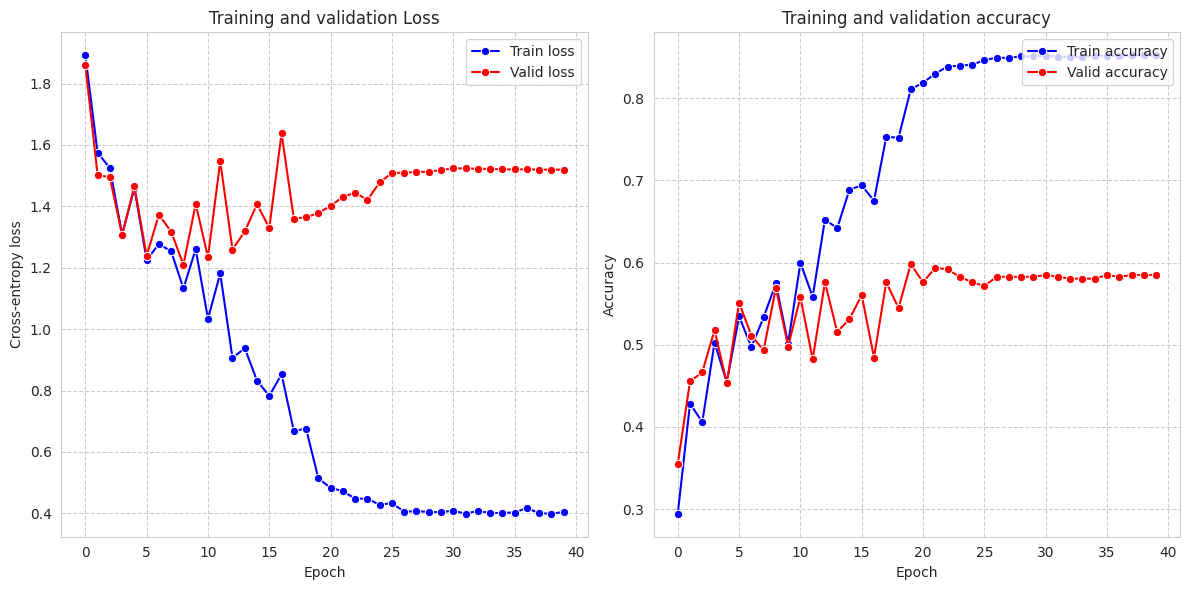

In [5]:
from config import Config
from trainer import train

config = Config()

# datastructure
config.data_dir = '../data'
config.models_dir = '../models'
config.fold_dir = '/content/fold'
config.model_name = 'baseline_convnet'

# Training parameters
config.learning_rate = 1e-3
config.train_batch_size = 32
config.valid_batch_size = 32
config.num_epochs = 200
config.early_stop_count = 20

# Model arch
config.model_arch_depth = [16, 32, 64, 128]
config.dropout_map = [0, 0, 0.1, 0.2]
config.dropout_fc = [0.1, 0.2]

# Data augmentation
config.aug_dir = '/content/aug_data'
config.aug_size = 100       # additional samples = aug_size - original_size

# fold
config.fold = 4

_ = train(config = config)

**Performance Evaluation**:
- Training the model with additional 100 augmented images for each label performed poorly with only 0.598 validation accuracy.

## END